# Website Performance Predictor

In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split




from pylab import rcParams
rcParams['figure.figsize'] = 20,8


# Importing Regression Algorithms
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder


#Importing Evaluation Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.compose import ColumnTransformer

#Importing Pipelines

from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [3]:
import os

In [4]:
os.listdir()

['Untitled7.ipynb',
 'Untitled5.ipynb',
 'Untitled1.ipynb',
 'Untitled3.ipynb',
 'Untitled.ipynb',
 'Untitled4.ipynb',
 'Untitled6.ipynb',
 'Untitled2.ipynb',
 'website_performance.csv',
 'Untitled8.ipynb',
 '.ipynb_checkpoints']

# Loading Dataset

In [6]:
dt = pd.read_csv("website_performance.csv")
dt

,traffic_source,dates,hours,users,sessions,engaged_sessions,avg_engagement_time_per_session,engaged_sessions_per_user,events_per_session,engagement_rate,event_count,page_views,session_duration,bounce_rate,time_on_page,previous_visits,conversion_rate
0,Direct,2024-05-29 00:00:00,4,11,17,6,00:00:59.352941,0.55,3.88,0.35,66,2,2.773784,0.485768,2.973653,3,1.0
1,Direct,2024-05-28 00:00:00,6,11,15,5,00:00:05.466667,0.45,2.67,0.33,40,2,2.773784,0.485768,2.973653,3,1.0
2,Direct,2024-09-27 00:00:00,5,11,16,2,00:00:09.625,0.18,3.13,0.13,50,2,2.773784,0.485768,2.973653,3,1.0
3,Direct,2024-05-16 00:00:00,3,11,18,6,00:00:05.833333,0.55,3.06,0.33,55,2,2.773784,0.485768,2.973653,3,1.0
4,Direct,2024-02-08 00:00:00,2,11,18,3,00:00:20.222222,0.27,3.11,0.17,56,2,2.773784,0.485768,2.973653,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346169,Direct,2024-03-17 00:00:00,22,103,132,65,00:00:34.462121,0.63,3.98,0.49,525,3,0.882638,0.338026,5.186908,3,1.0
346170,Direct,2024-06-29 00:00:00,23,128,152,70,00:01:04.125,0.55,4.65,0.46,707,3,0.882638,0.338026,5.186908,3,1.0
346171,Direct,2024-03-16 00:00:00,22,158,192,94,00:00:39.020833,0.59,4.06,0.49,779,3,0.882638,0.338026,5.186908,3,1.0
346172,Direct,2024-03-17 00:00:00,23,188,233,115,00:00:39.939914,0.61,4.59,0.49,1069,3,0.882638,0.338026,5.186908,3,1.0


# Exploratory data Analysis

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346174 entries, 0 to 346173
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   traffic_source                   346174 non-null  object 
 1   dates                            346174 non-null  object 
 2   hours                            346174 non-null  int64  
 3   users                            346174 non-null  int64  
 4   sessions                         346174 non-null  int64  
 5   engaged_sessions                 346174 non-null  int64  
 6   avg_engagement_time_per_session  346174 non-null  object 
 7   engaged_sessions_per_user        346174 non-null  float64
 8   events_per_session               346174 non-null  float64
 9   engagement_rate                  346174 non-null  float64
 10  event_count                      346174 non-null  int64  
 11  page_views                       346174 non-null  int64  
 12  se

In [9]:
dt.duplicated().sum()    #Checking duplicates

0

In [10]:
dt.isnull().sum()        #Checking Null Values

traffic_source                     0
dates                              0
hours                              0
users                              0
sessions                           0
engaged_sessions                   0
avg_engagement_time_per_session    0
engaged_sessions_per_user          0
events_per_session                 0
engagement_rate                    0
event_count                        0
page_views                         0
session_duration                   0
bounce_rate                        0
time_on_page                       0
previous_visits                    0
conversion_rate                    0
dtype: int64

In [11]:
dt.describe()

,hours,users,sessions,engaged_sessions,engaged_sessions_per_user,events_per_session,engagement_rate,event_count,page_views,session_duration,bounce_rate,time_on_page,previous_visits,conversion_rate
count,346174.000000,346174.000000,346174.000000,346174.000000,346174.000000,346174.000000,346174.000000,346174.000000,346174.000000,346174.000000,346174.000000,346174.000000,346174.000000,346174.000000
mean,11.494318,41.884754,49.991244,28.636602,0.686432,5.039374,0.575695,251.608434,4.974862,2.944566,0.273934,3.969707,1.998018,0.983950
std,6.916751,19.476809,22.740395,13.964122,0.133524,1.228977,0.132146,126.136946,2.221200,2.954264,0.151185,3.017110,1.493356,0.061451
min,0.000000,4.000000,4.000000,2.000000,0.180000,2.670000,0.130000,29.000000,0.000000,0.005623,0.013264,0.102497,0.000000,0.562878
25%,6.000000,26.000000,32.000000,17.000000,0.590000,4.130000,0.470000,153.000000,3.000000,0.857196,0.159121,1.805209,1.000000,1.000000
50%,11.000000,43.000000,52.000000,28.000000,0.700000,4.870000,0.580000,246.000000,5.000000,1.971501,0.260372,3.101314,2.000000,1.000000
75%,17.000000,55.000000,65.000000,39.000000,0.790000,5.760000,0.680000,330.000000,7.000000,4.034512,0.377159,5.406629,3.000000,1.000000
max,23.000000,237.000000,300.000000,144.000000,1.170000,10.860000,1.000000,1402.000000,12.000000,18.956373,0.747843,20.021285,7.000000,1.000000


In [12]:
for i in dt.select_dtypes(include=np.number).columns:
    print(dt[i].value_counts())
    print("---"*13)

hours
13    14476
6     14476
22    14476
12    14476
21    14476
11    14476
17    14476
15    14476
16    14476
14    14476
20    14476
0     14476
10    14476
1     14476
9     14476
7     14476
8     14476
2     14476
5     14476
23    14260
3     14260
19    14260
18    14175
4     14175
Name: count, dtype: int64
---------------------------------------
users
44     8442
52     8311
16     8311
41     8063
43     7971
       ... 
158     216
128     216
103     216
93      216
188     216
Name: count, Length: 91, dtype: int64
---------------------------------------
sessions
55     7964
52     7801
57     7755
54     7231
50     7153
       ... 
93      216
106     216
113     216
98      216
117     216
Name: count, Length: 105, dtype: int64
---------------------------------------
engaged_sessions
14     10556
27      9915
12      9869
39      9862
40      9777
       ...  
2        216
144      216
94       216
70       216
115      216
Name: count, Length: 69, dtype: int64
------

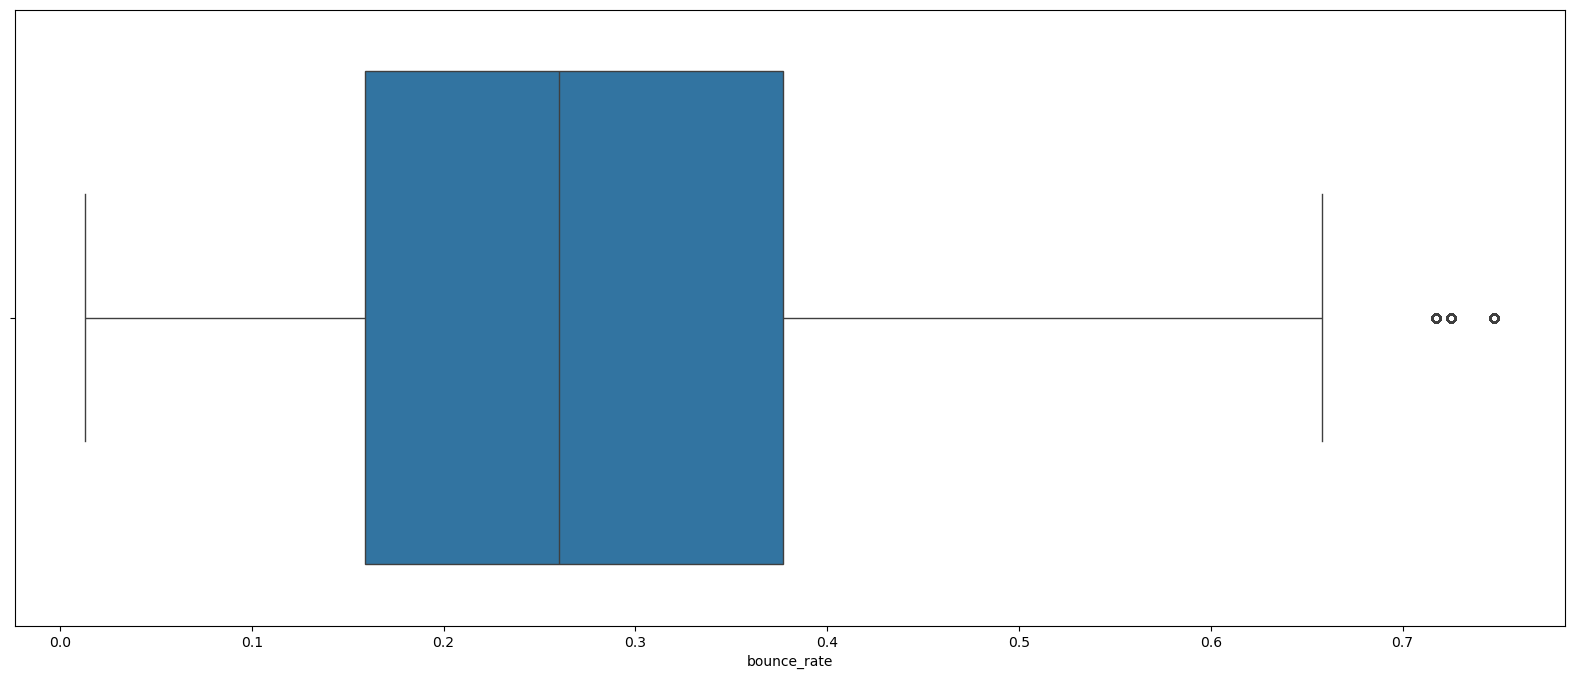

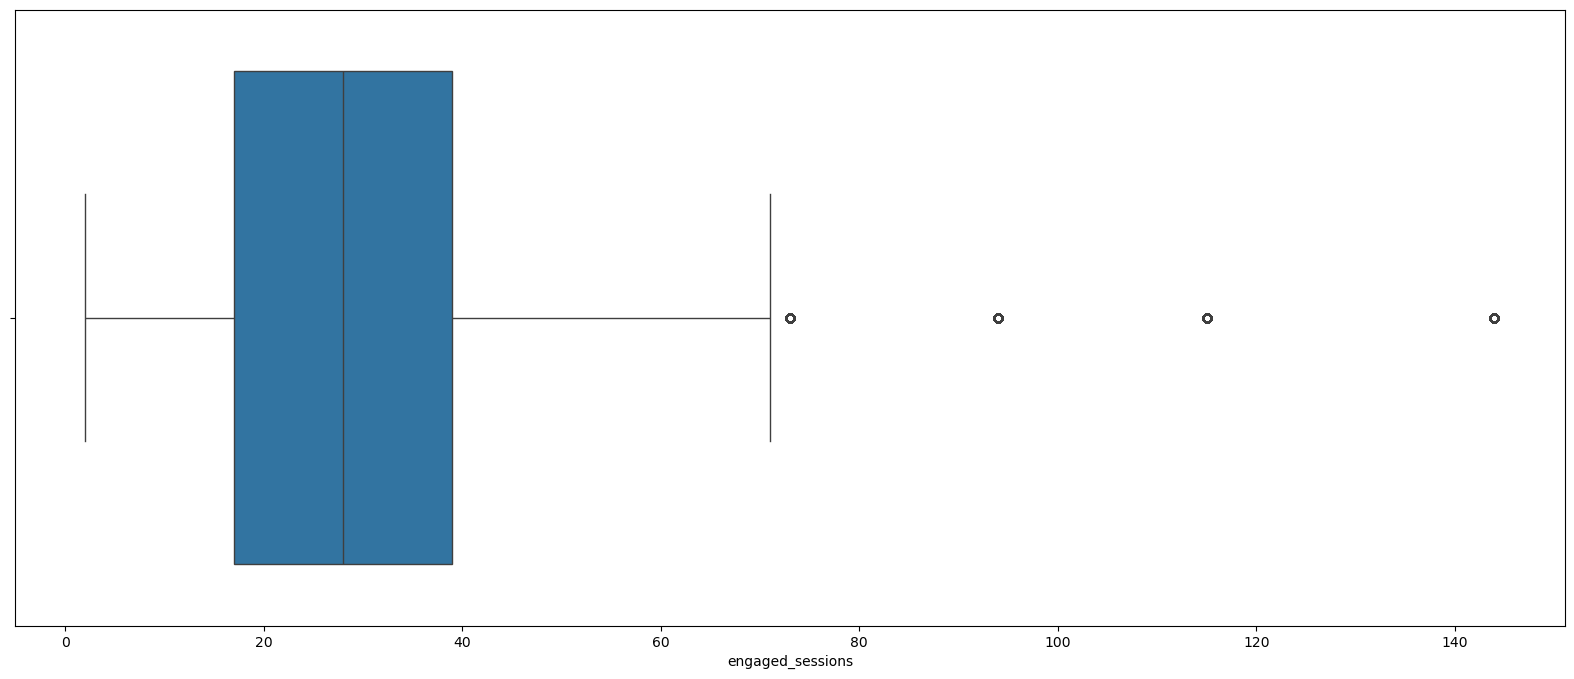

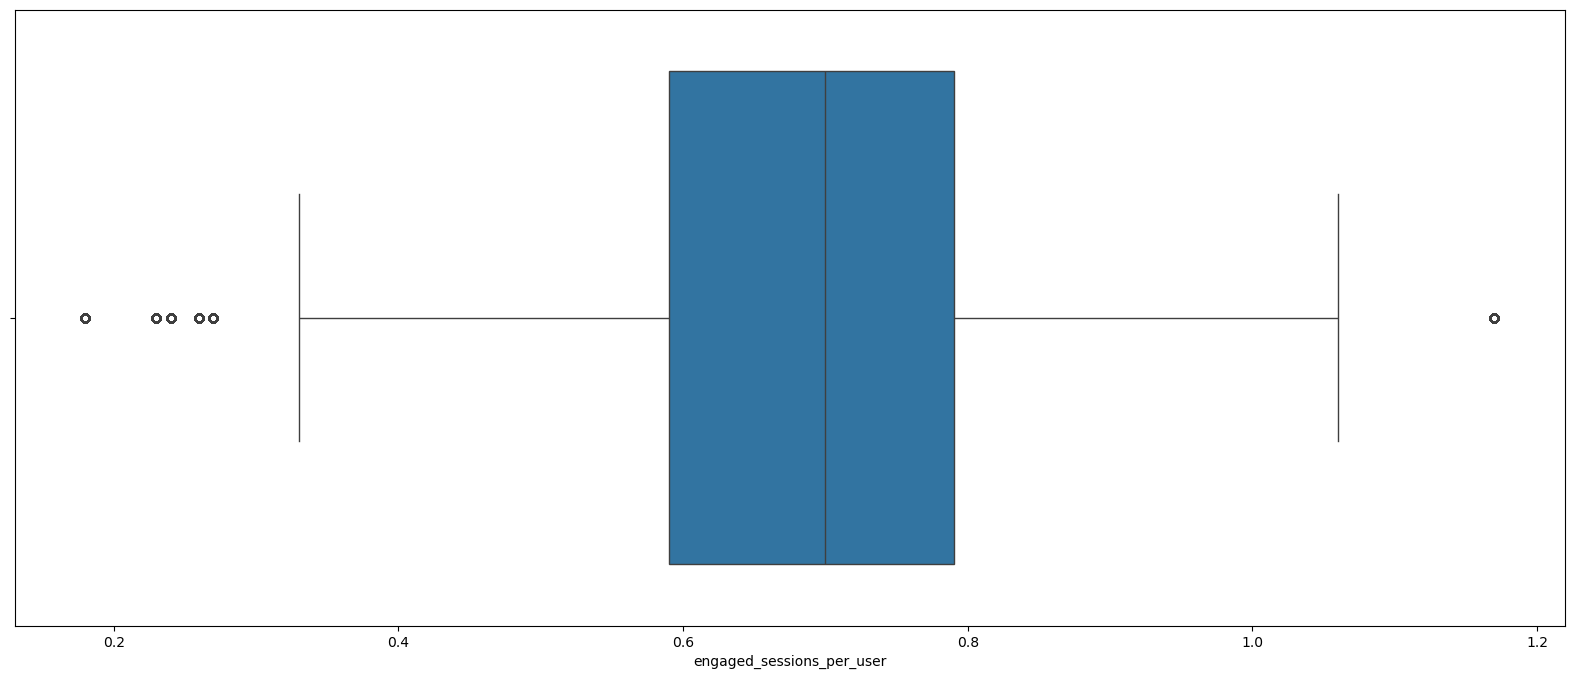

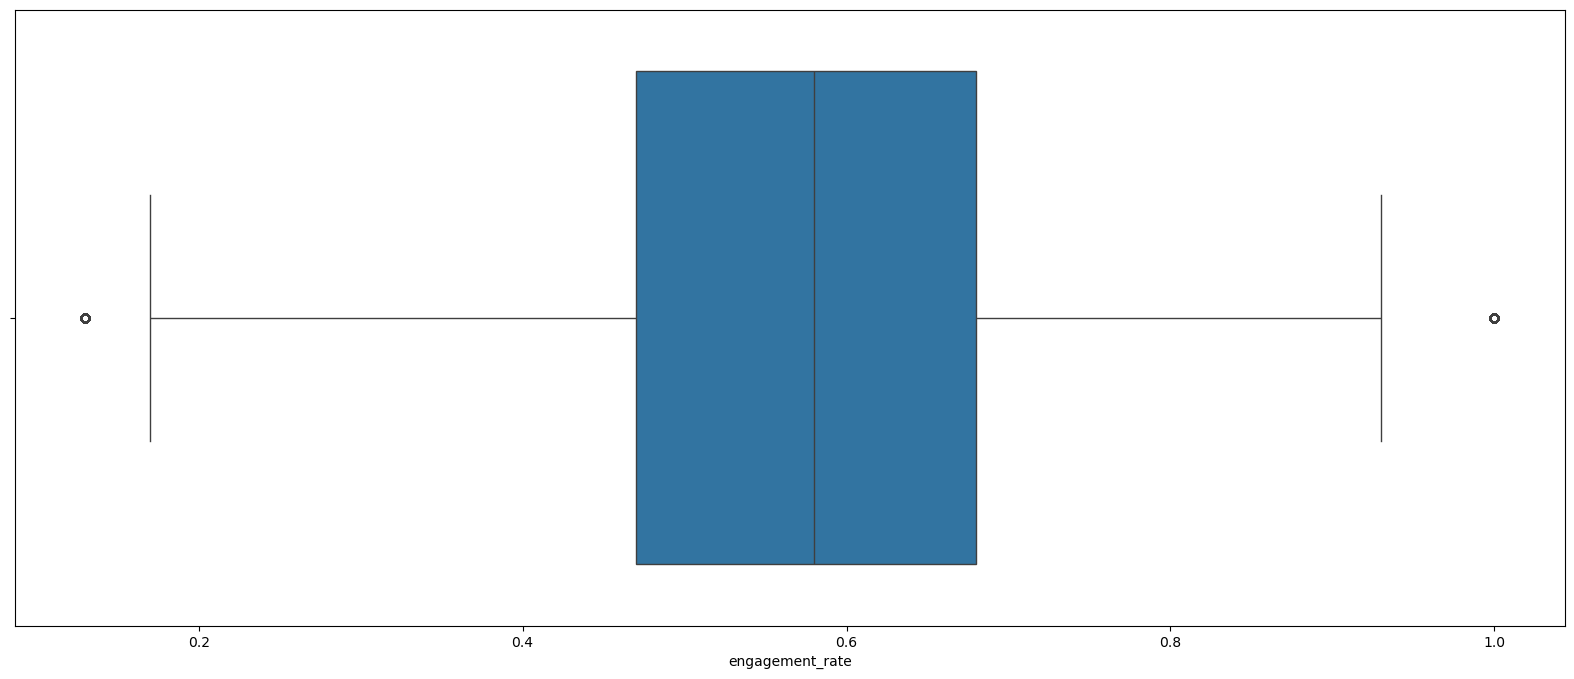

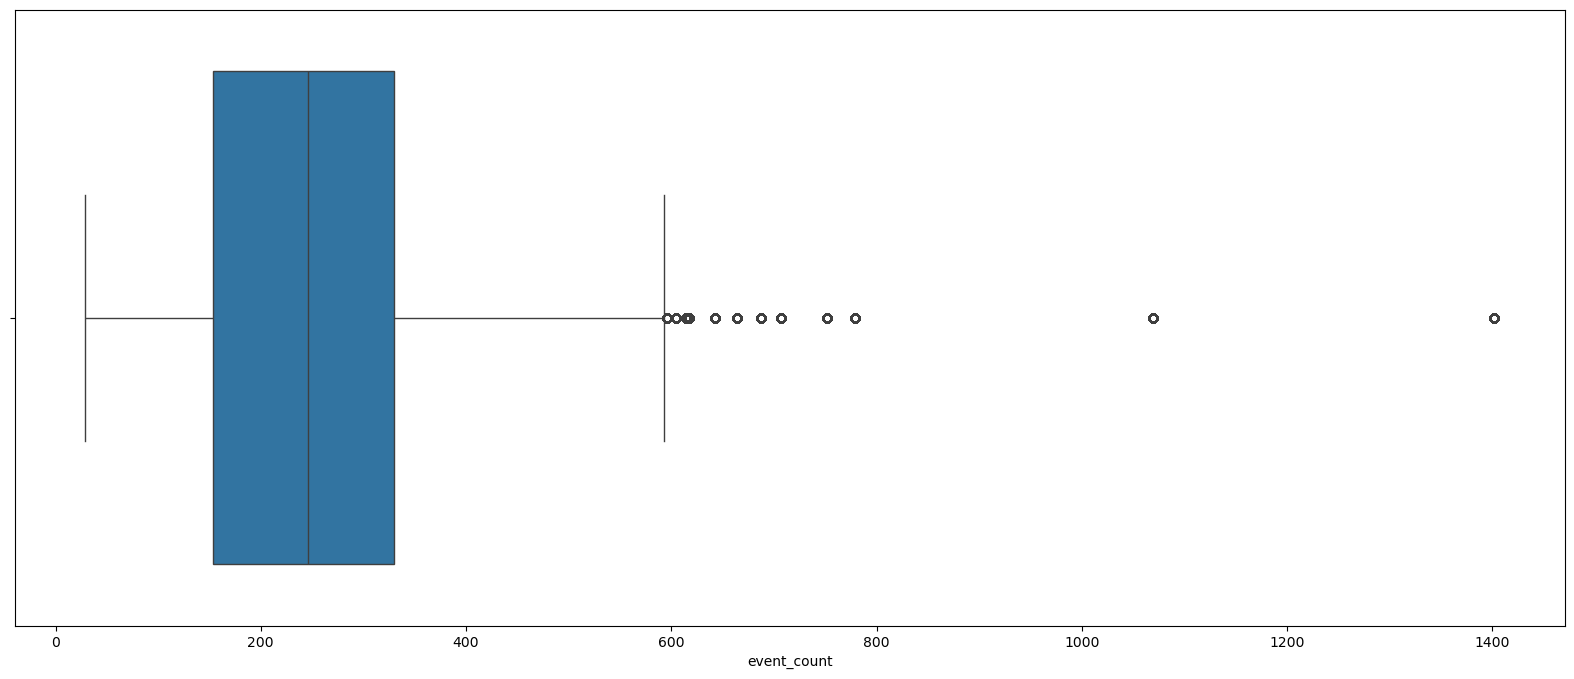

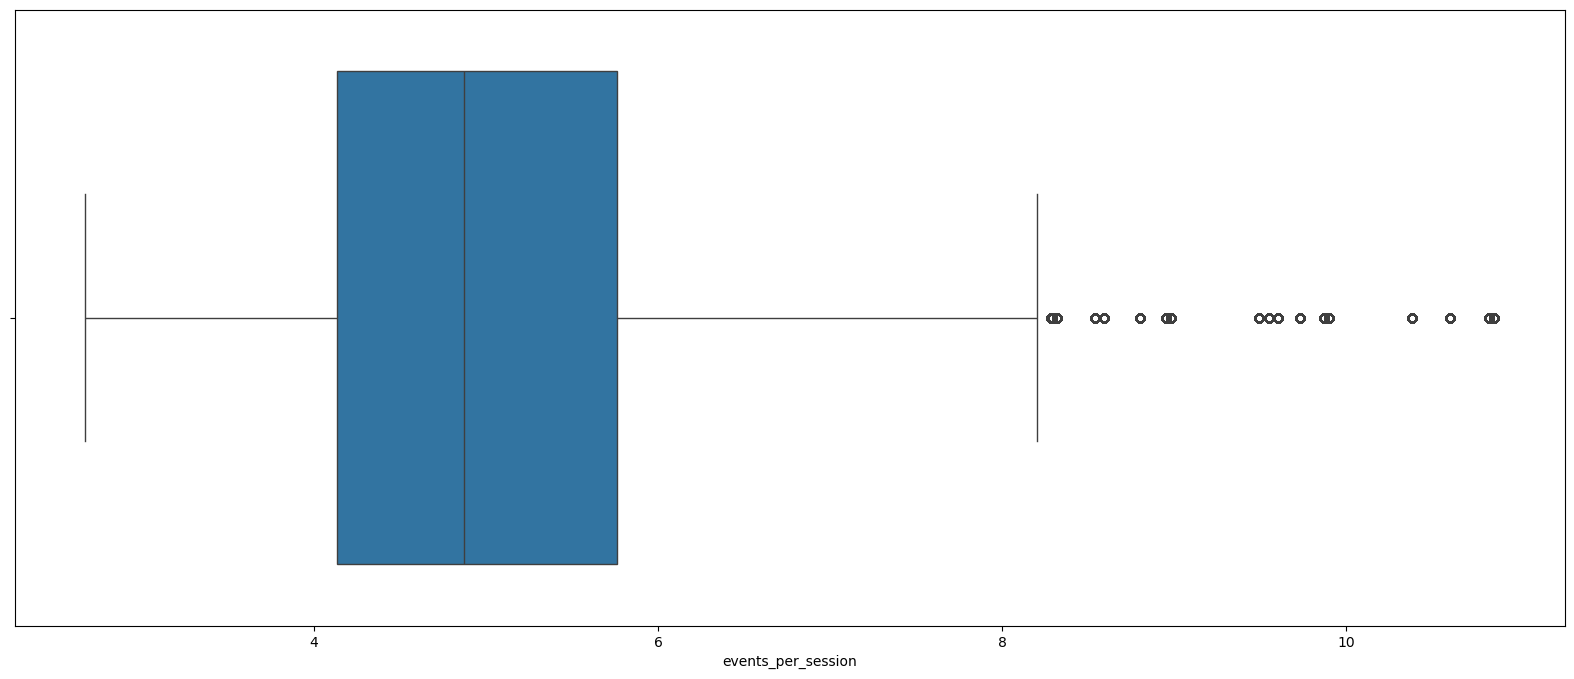

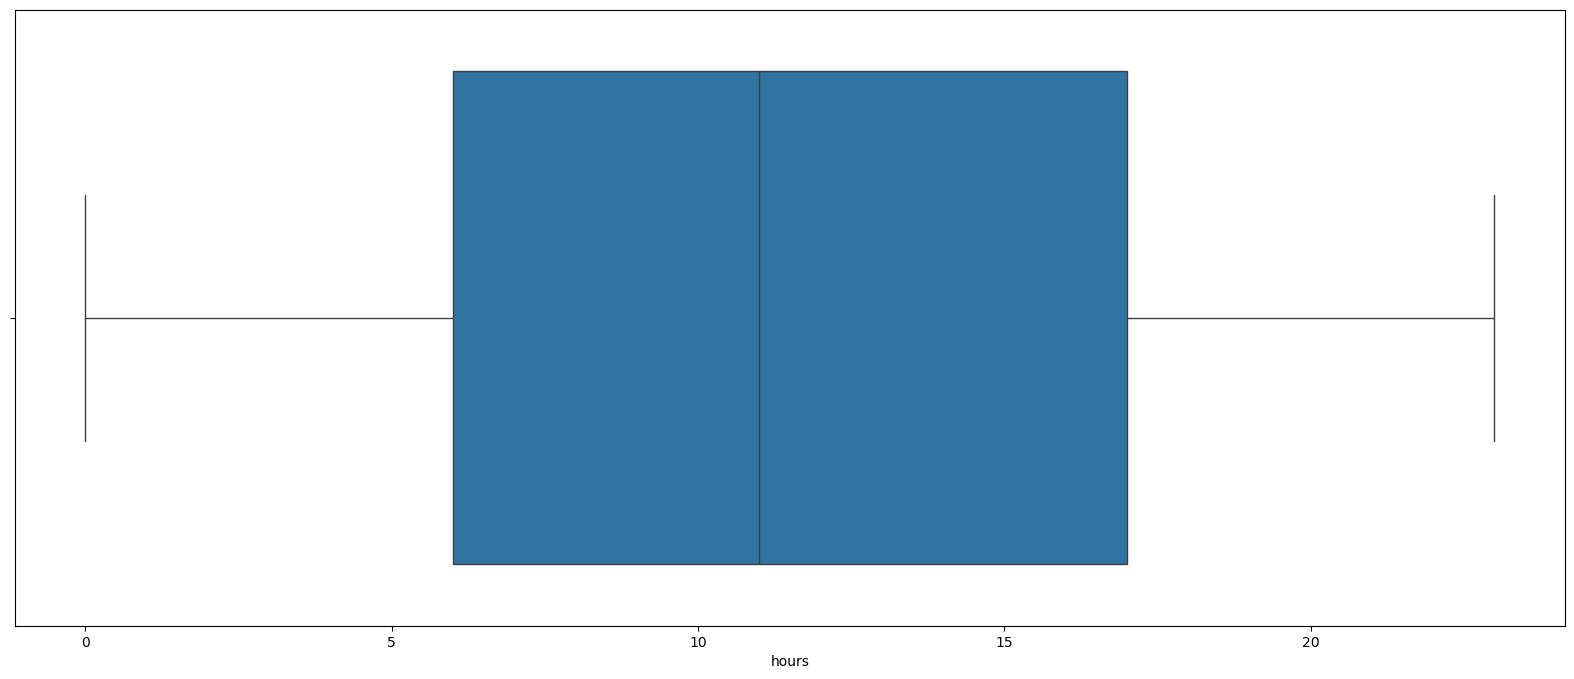

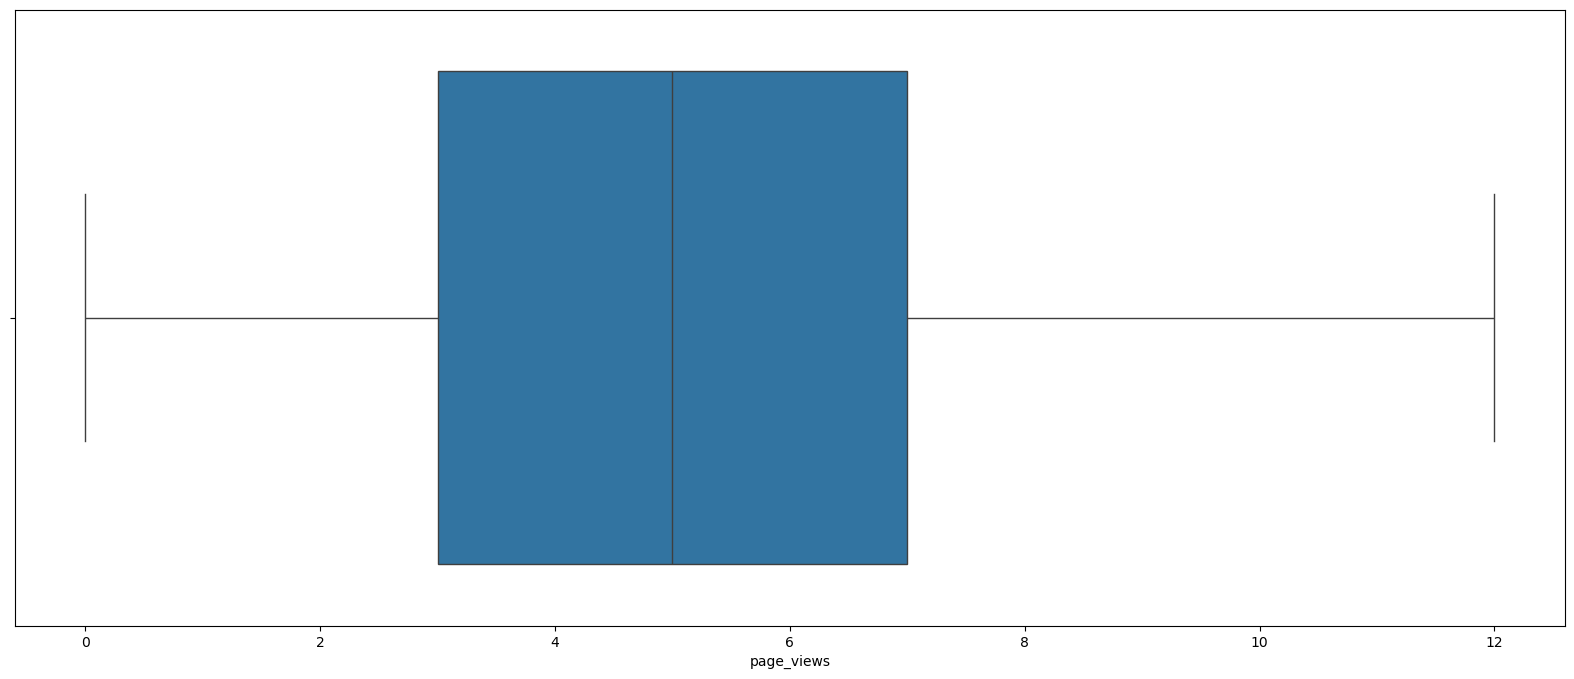

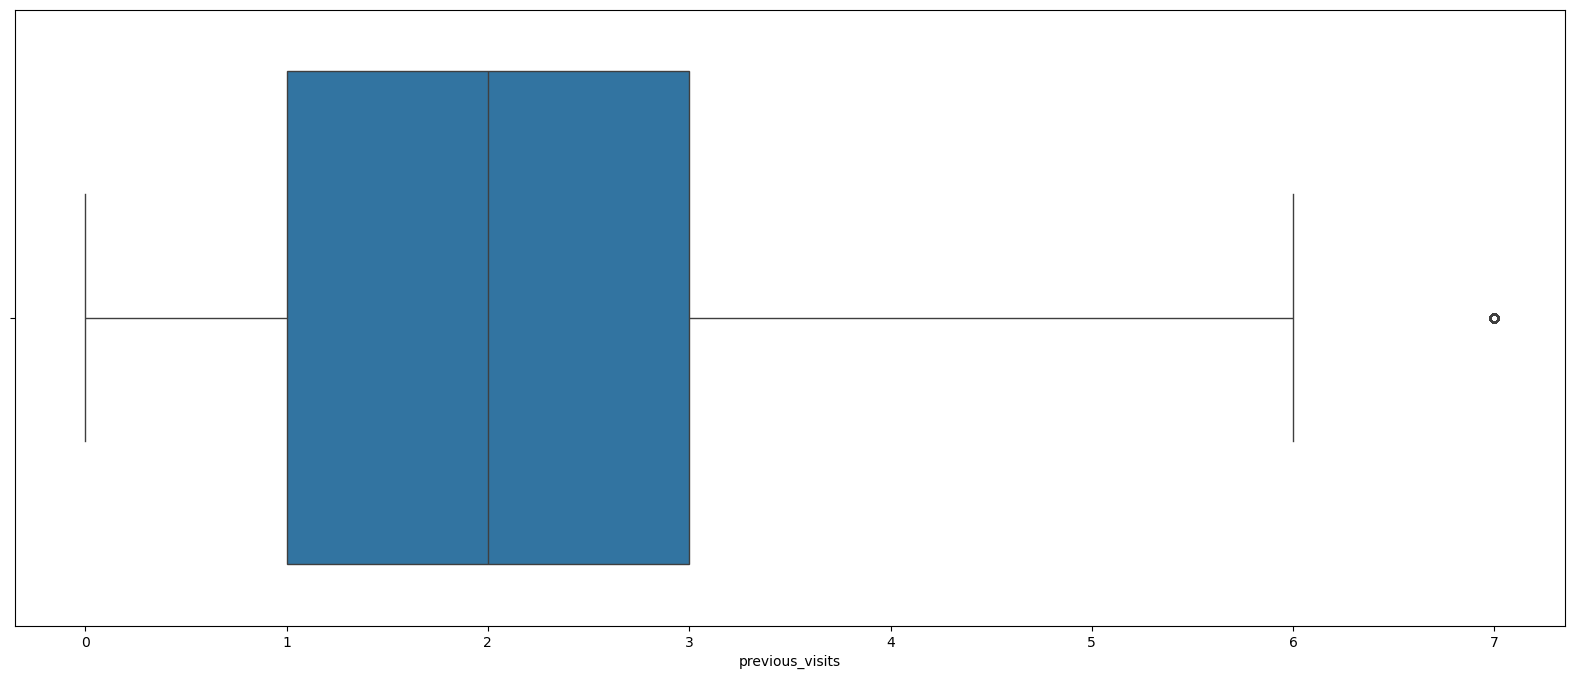

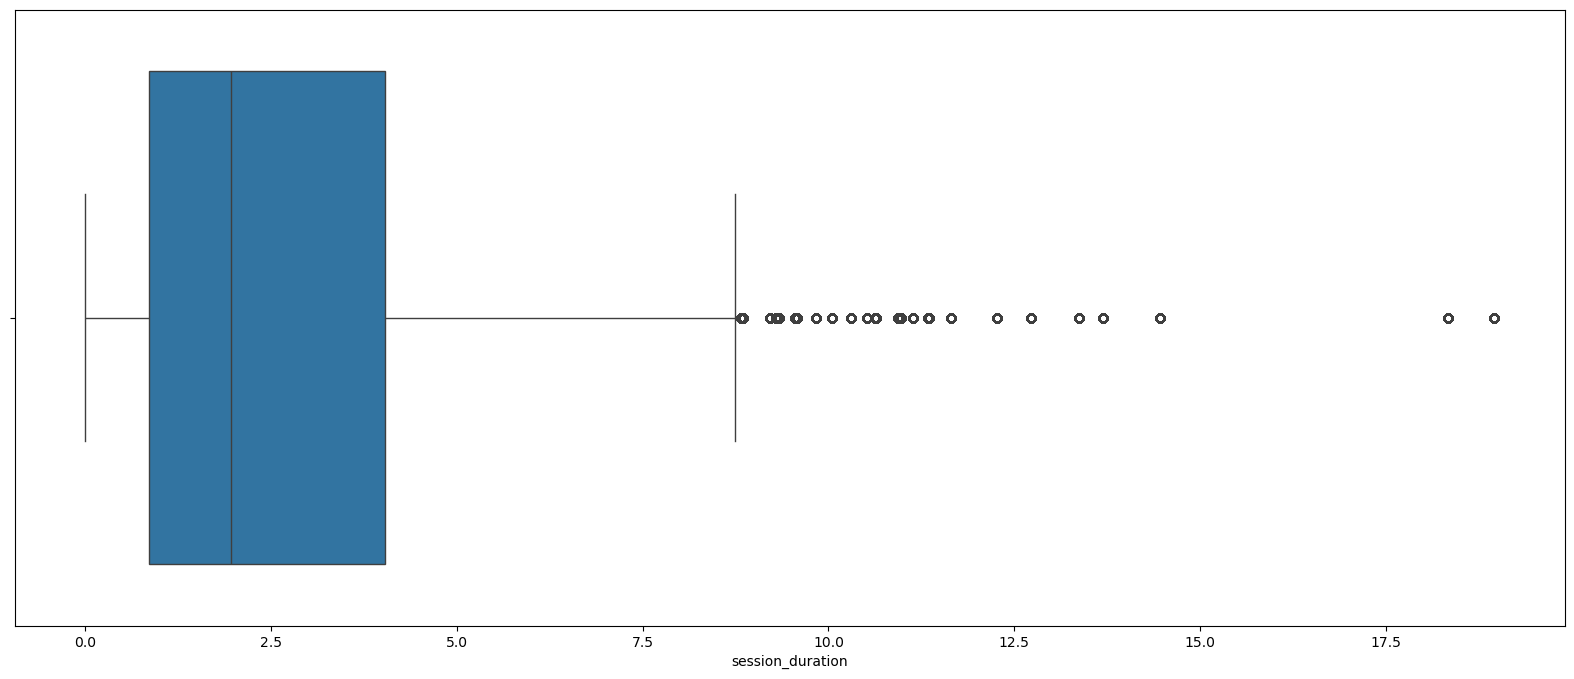

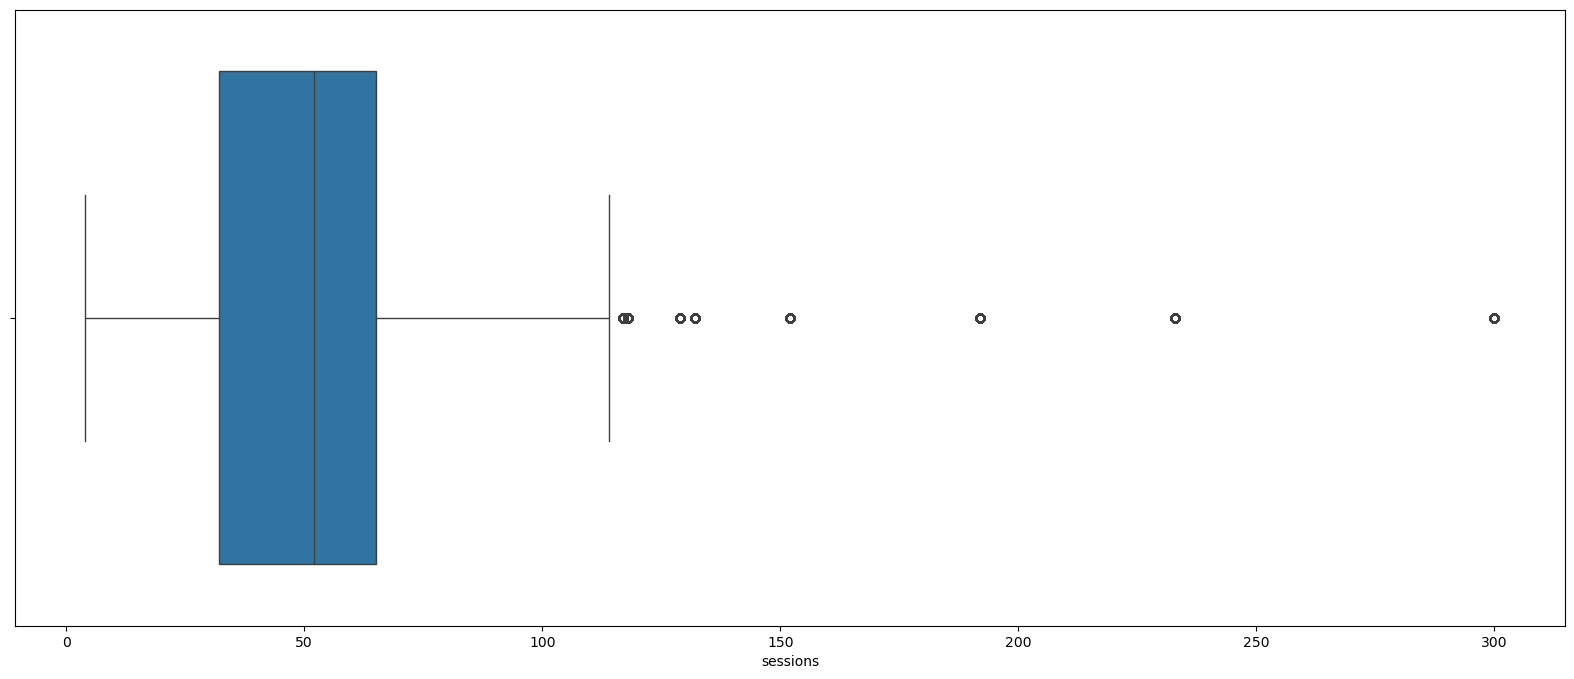

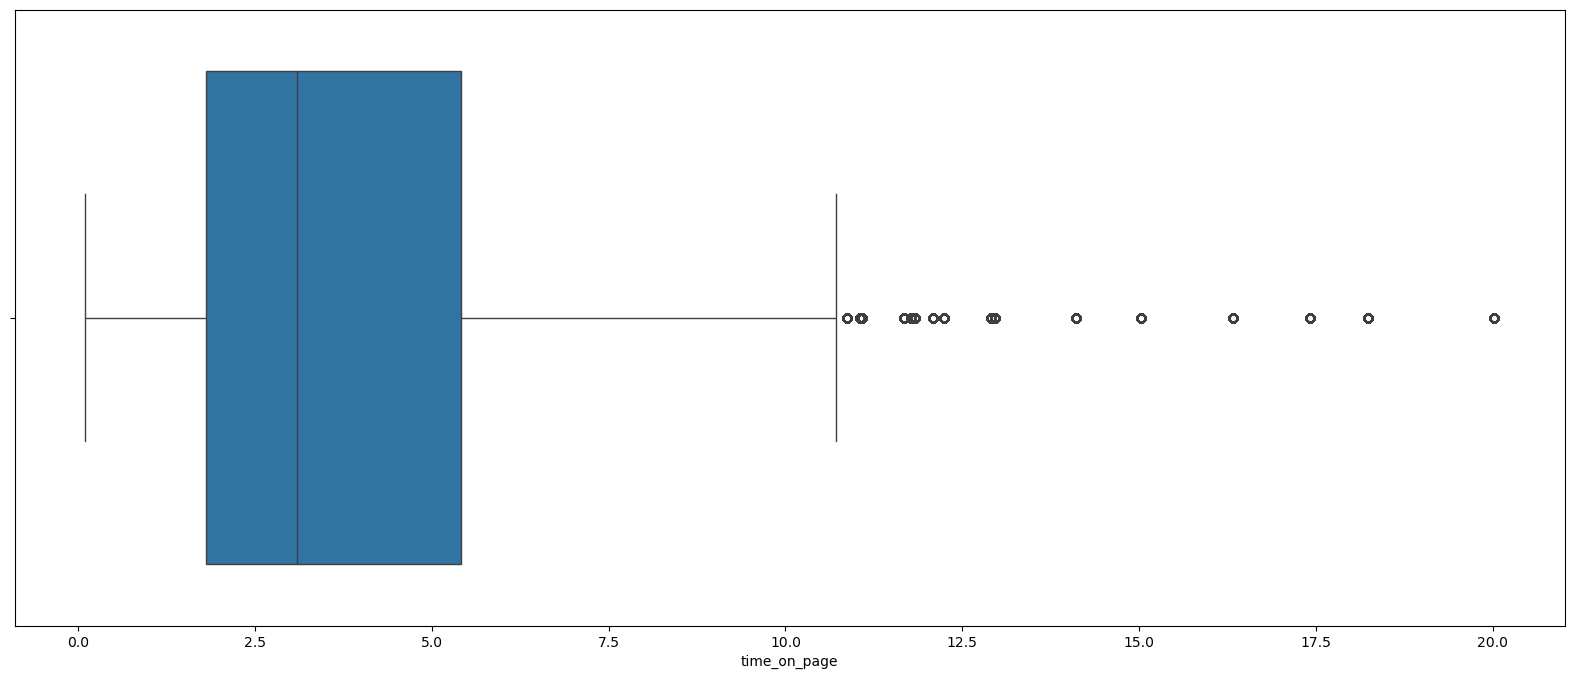

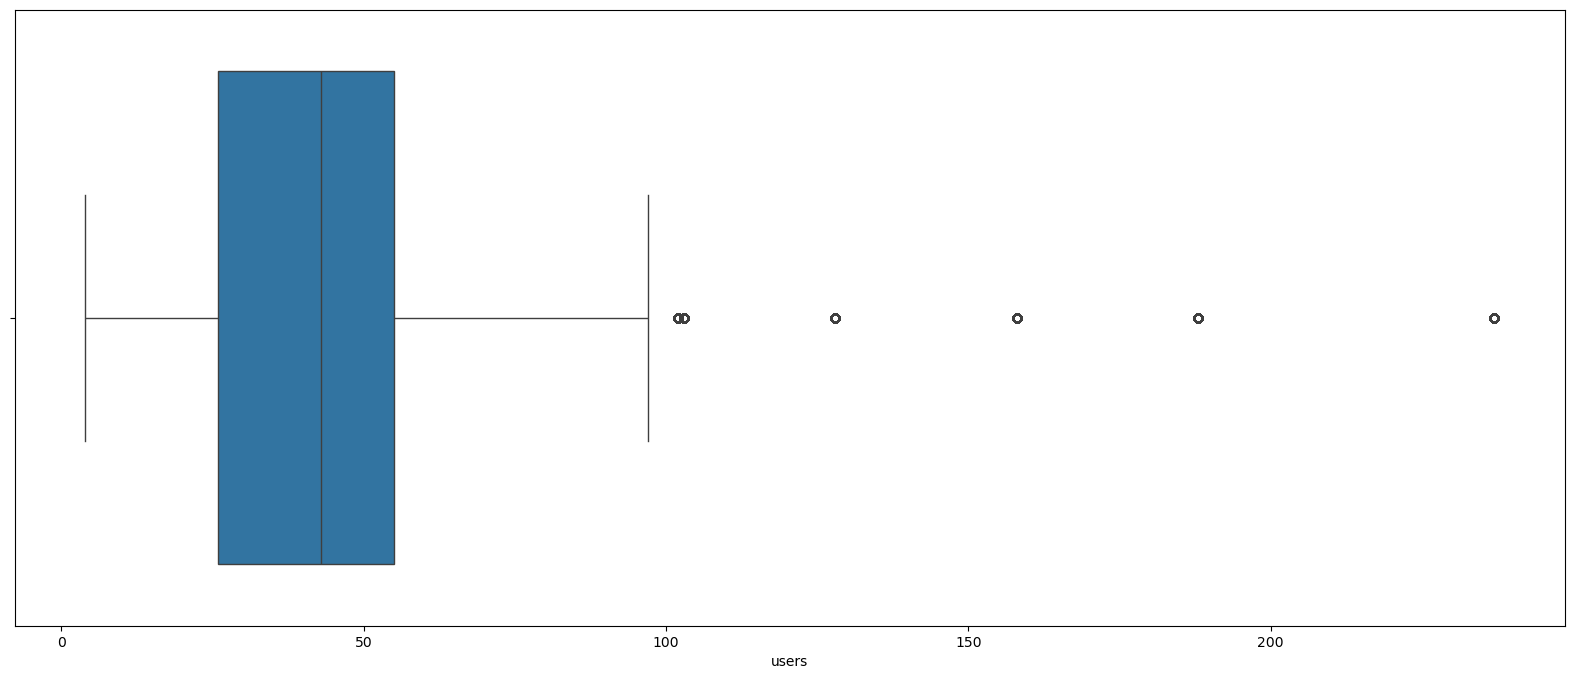

In [13]:
numerical_features = dt.select_dtypes(include="number").columns.difference(['conversion_rate'])

for i in numerical_features:
    sns.boxplot(data=dt, x=i)
    plt.show()

In [14]:
numerical_features = dt.select_dtypes(include="number").columns.difference(['conversion_rate'])

for i in numerical_features:
    q1 = dt[i].quantile(0.25)
    q3 = dt[i].quantile(0.75)
    print(f"q1 {i} = {q1} and q3 {i} = {q3}")
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    print(f"upper limit of {i} = {upper}")
    lower = q1 - 1.5 * iqr
    print(f"lower limit of {i} = {lower}")
    dt[i] = dt[i].clip(lower=lower, upper=upper)
    print("\n")

q1 bounce_rate = 0.159120602 and q3 bounce_rate = 0.377159081
upper limit of bounce_rate = 0.7042167994999999
lower limit of bounce_rate = -0.16793711649999998


q1 engaged_sessions = 17.0 and q3 engaged_sessions = 39.0
upper limit of engaged_sessions = 72.0
lower limit of engaged_sessions = -16.0


q1 engaged_sessions_per_user = 0.59 and q3 engaged_sessions_per_user = 0.79
upper limit of engaged_sessions_per_user = 1.09
lower limit of engaged_sessions_per_user = 0.28999999999999987


q1 engagement_rate = 0.47 and q3 engagement_rate = 0.68
upper limit of engagement_rate = 0.9950000000000001
lower limit of engagement_rate = 0.15499999999999986


q1 event_count = 153.0 and q3 event_count = 330.0
upper limit of event_count = 595.5
lower limit of event_count = -112.5


q1 events_per_session = 4.13 and q3 events_per_session = 5.76
upper limit of events_per_session = 8.205
lower limit of events_per_session = 1.685


q1 hours = 6.0 and q3 hours = 17.0
upper limit of hours = 33.5
lower limit o

# Treating Outliers

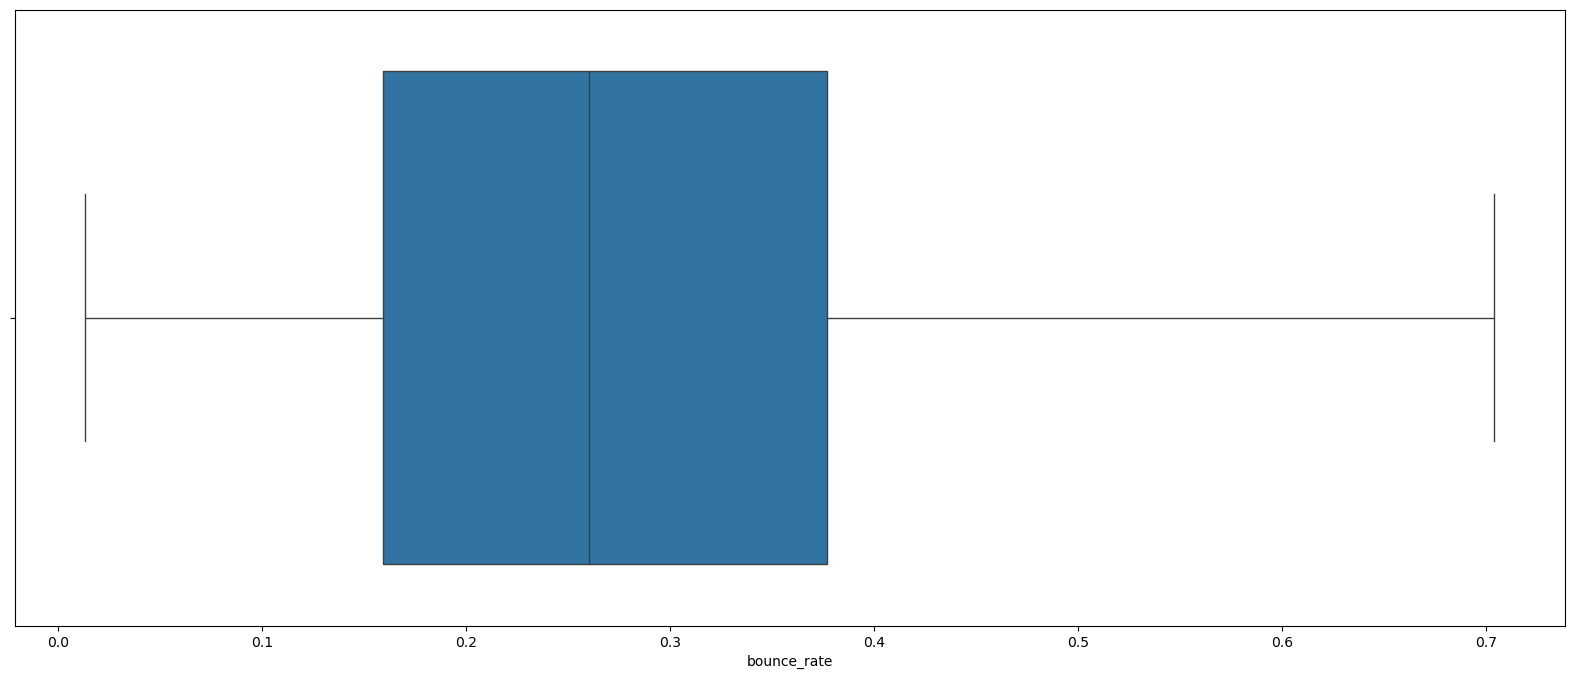

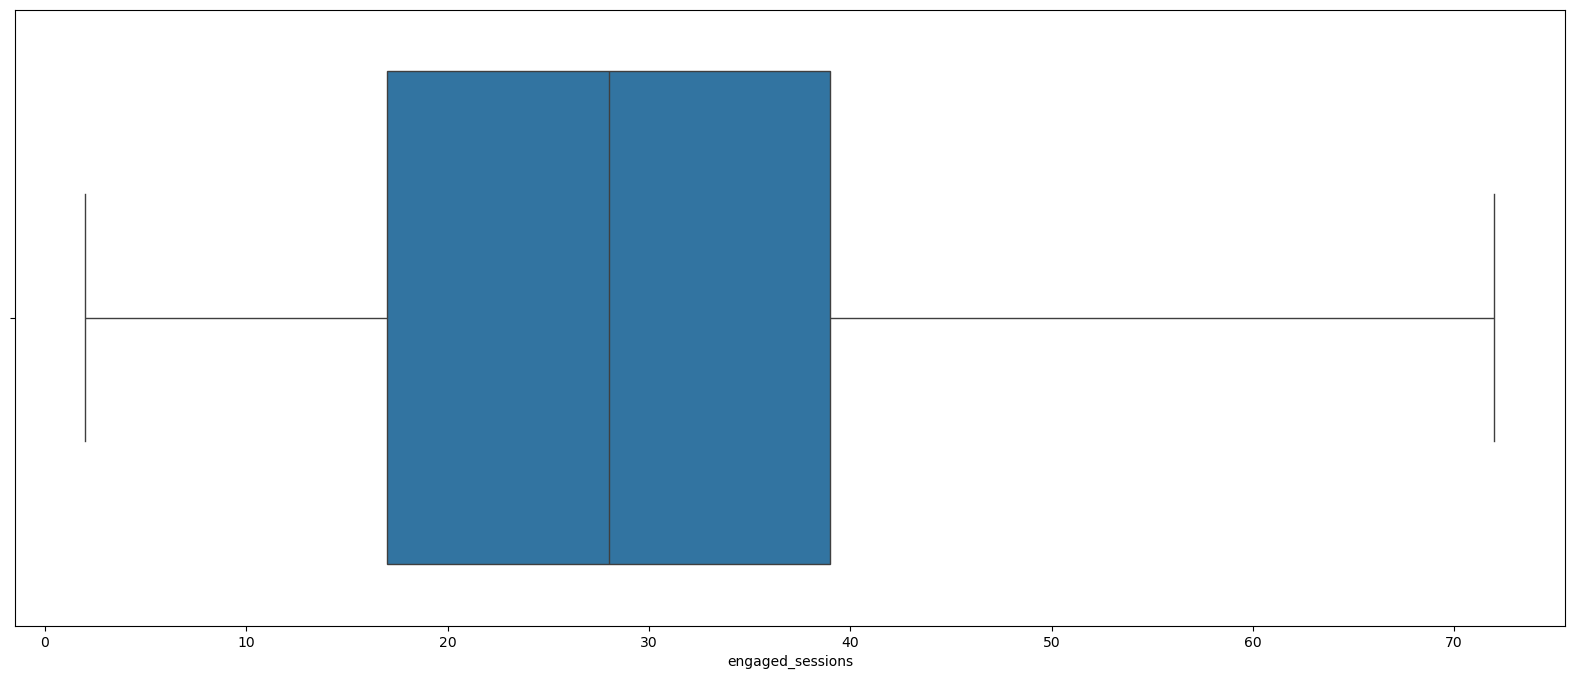

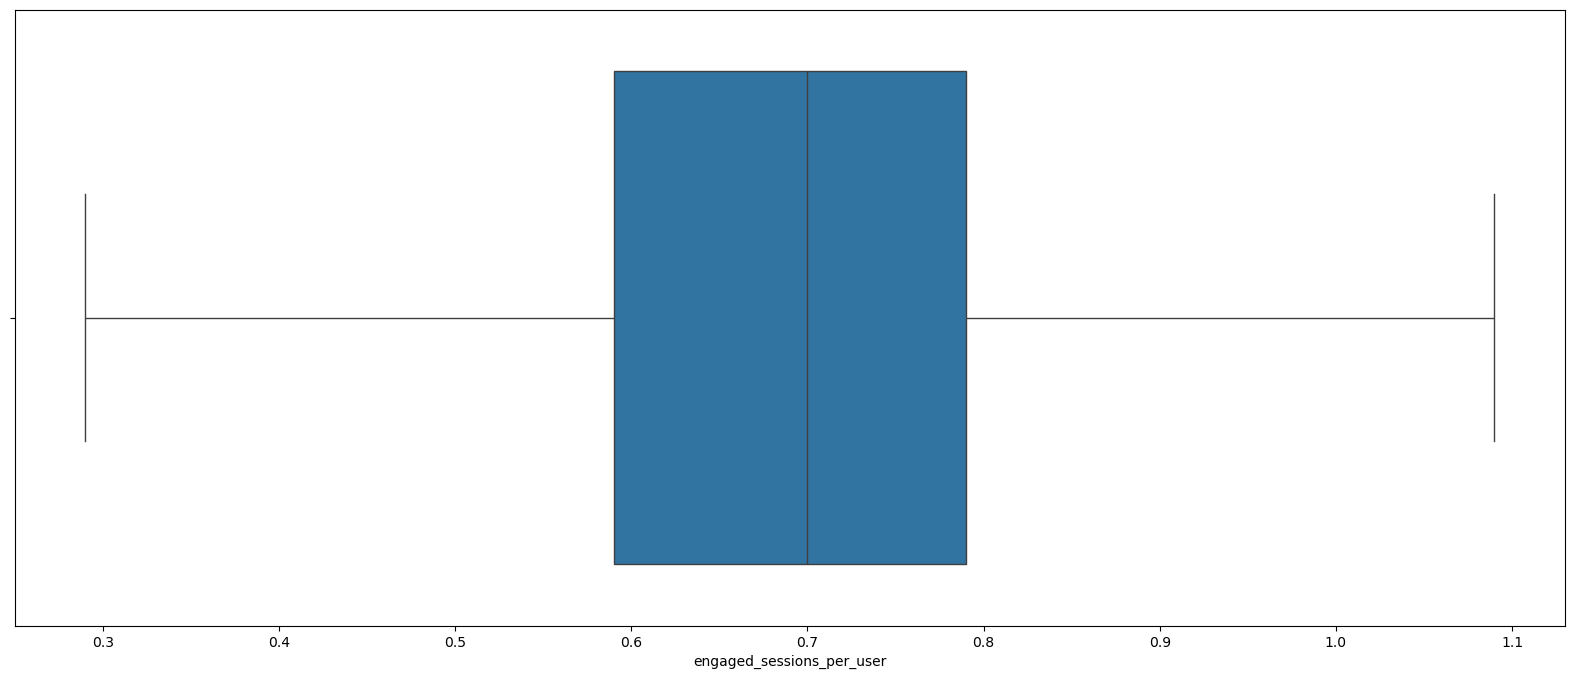

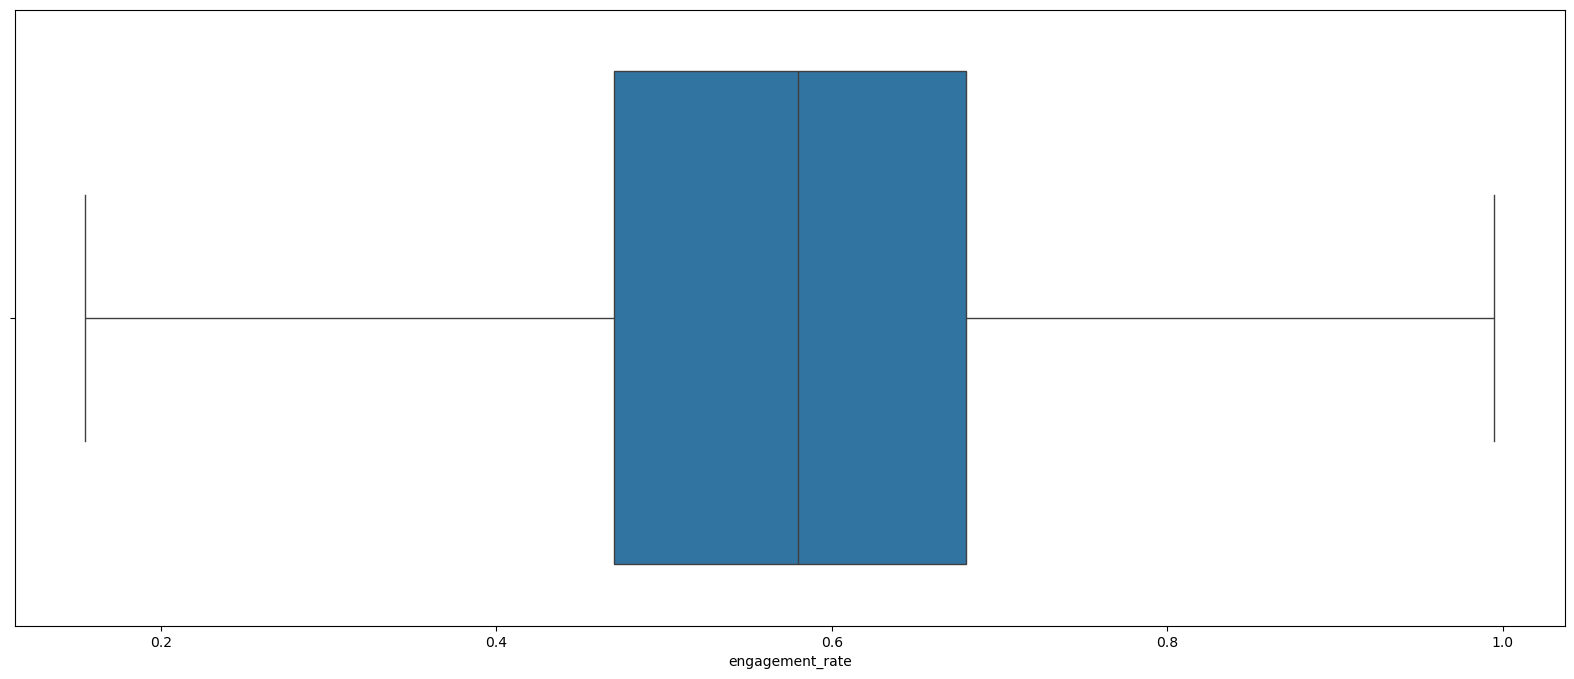

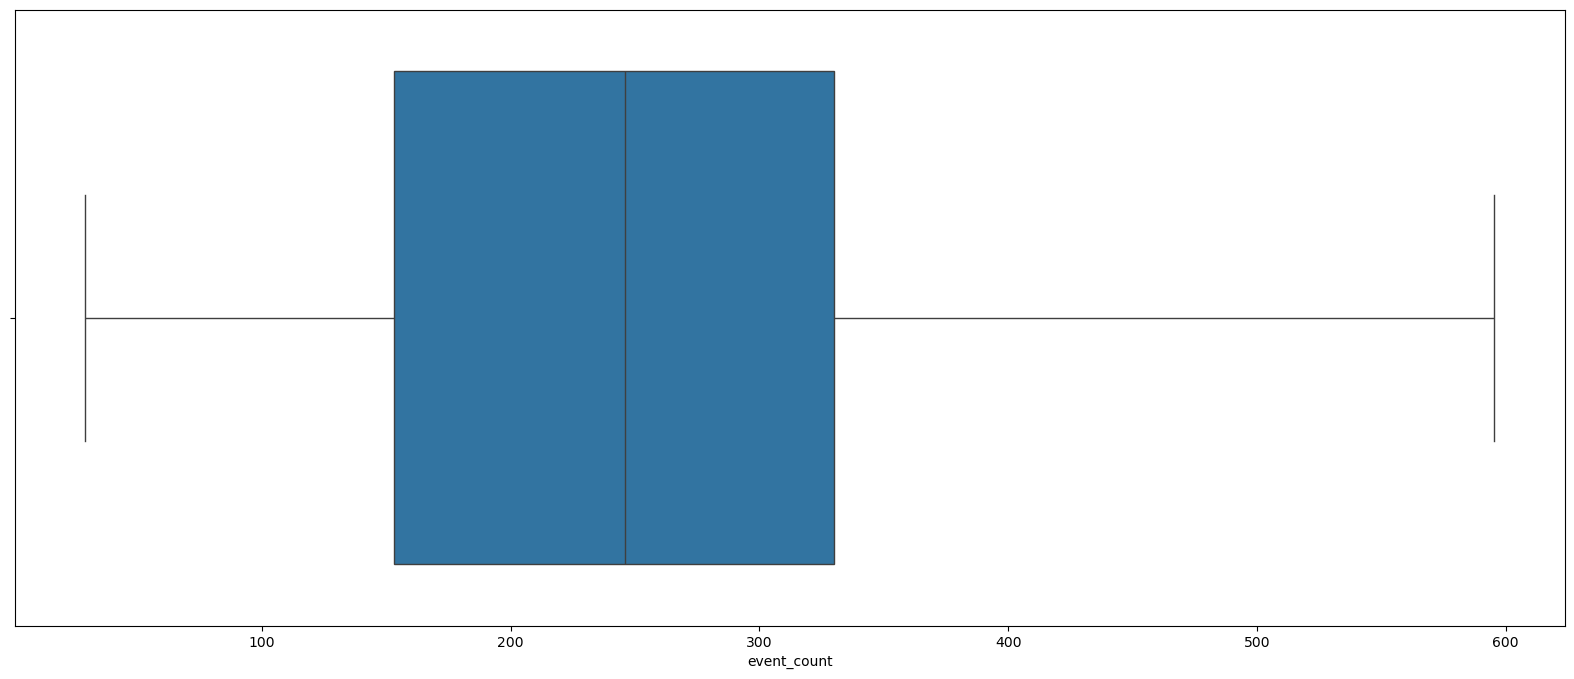

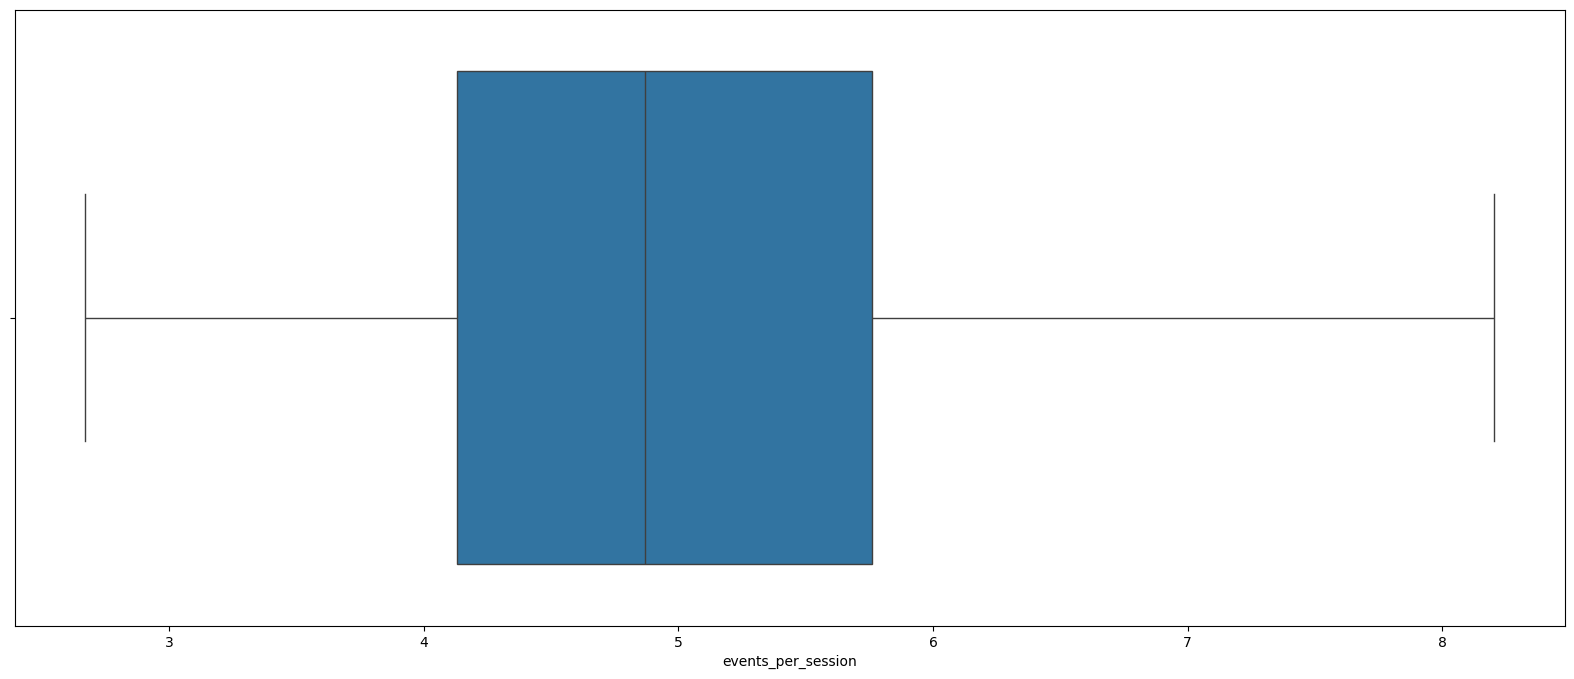

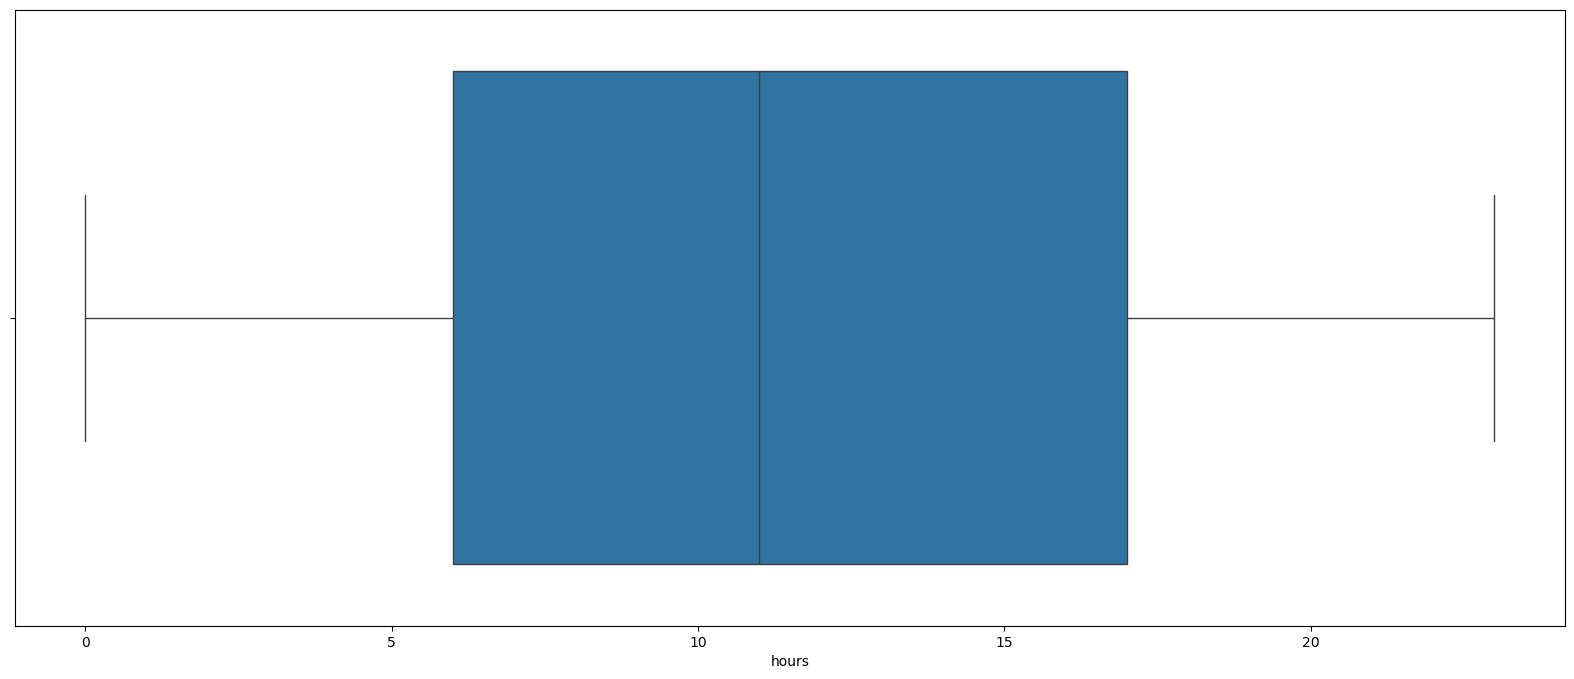

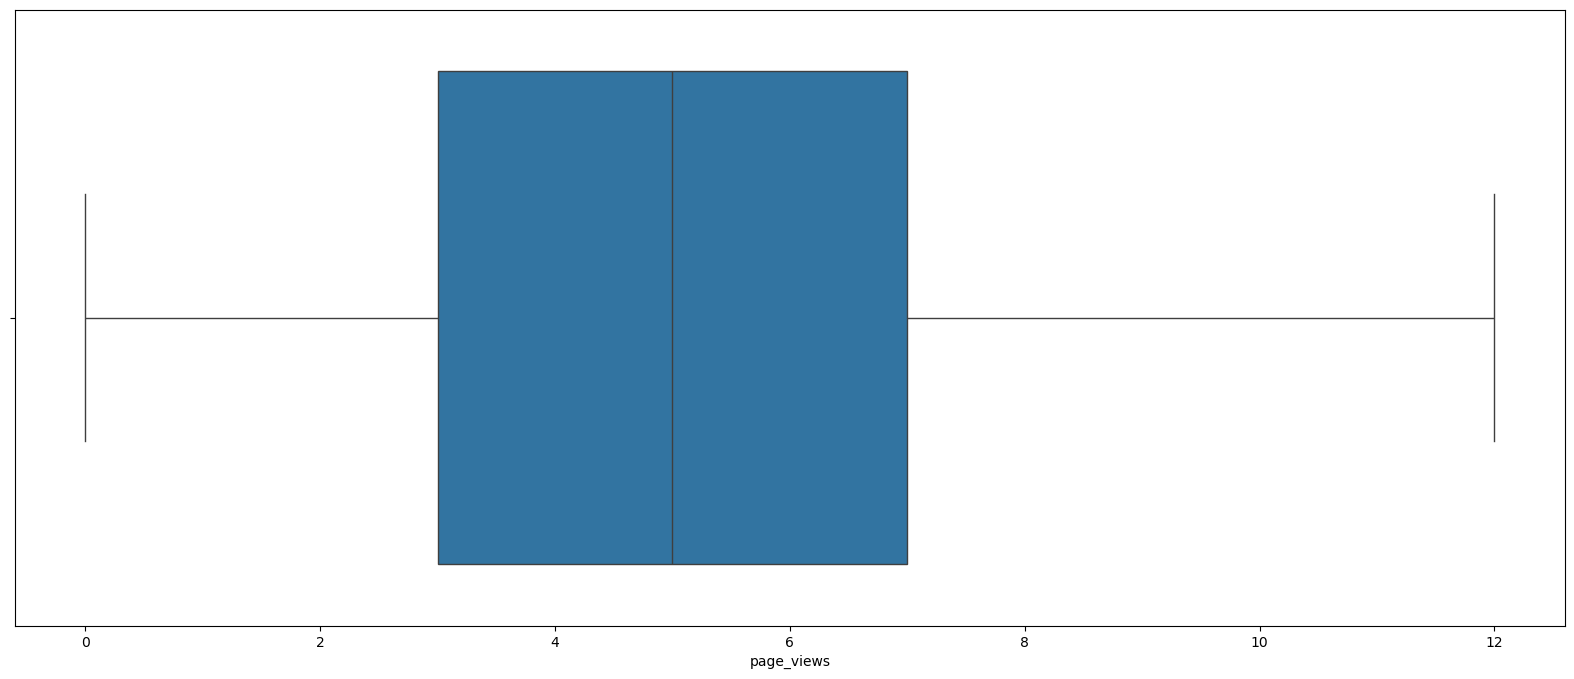

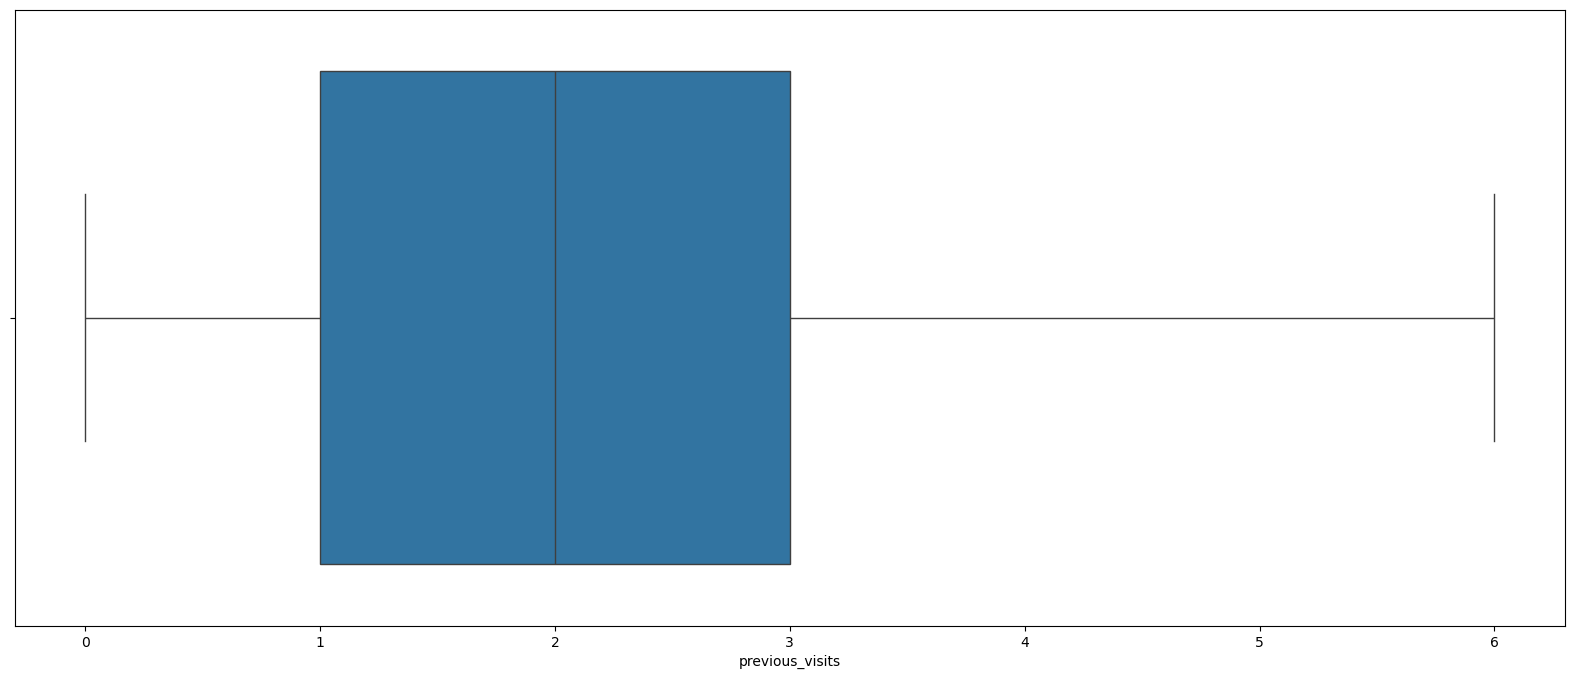

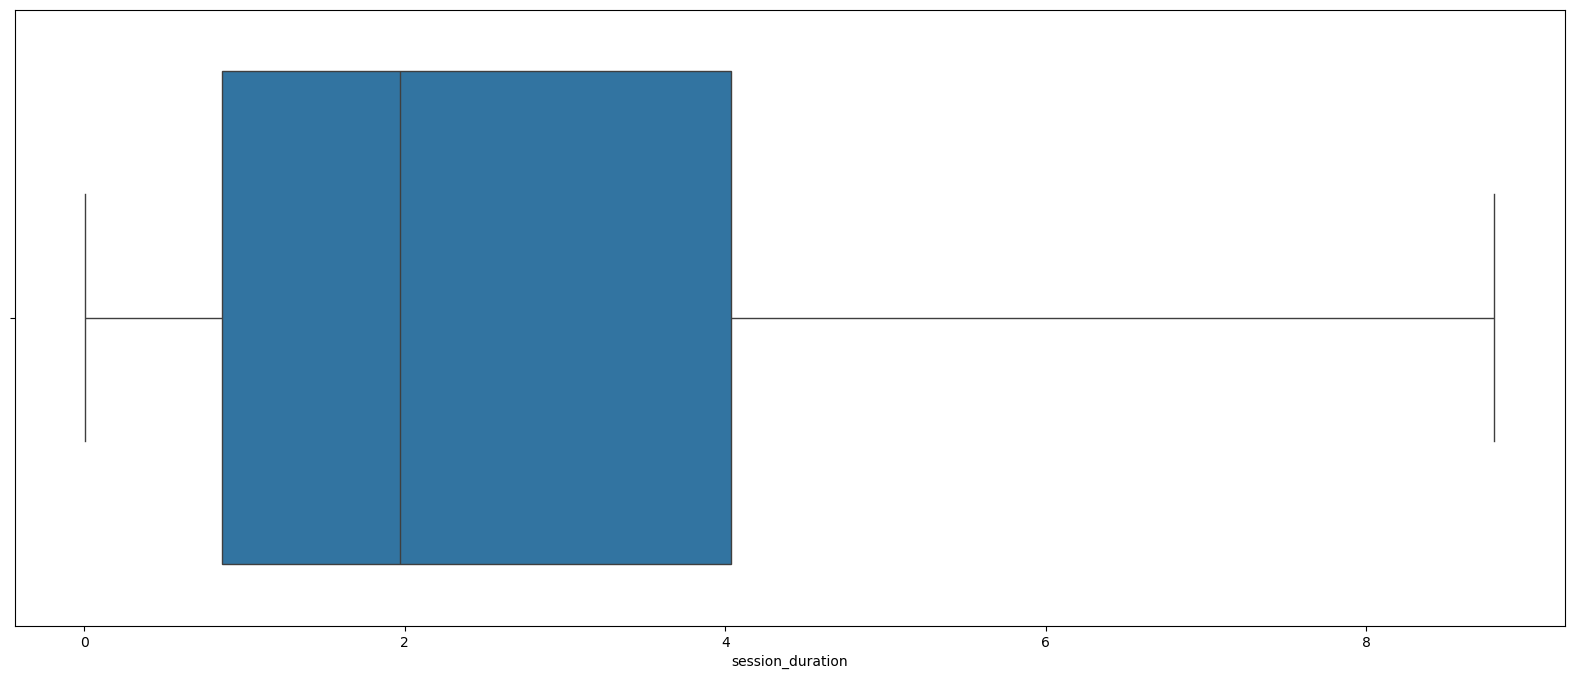

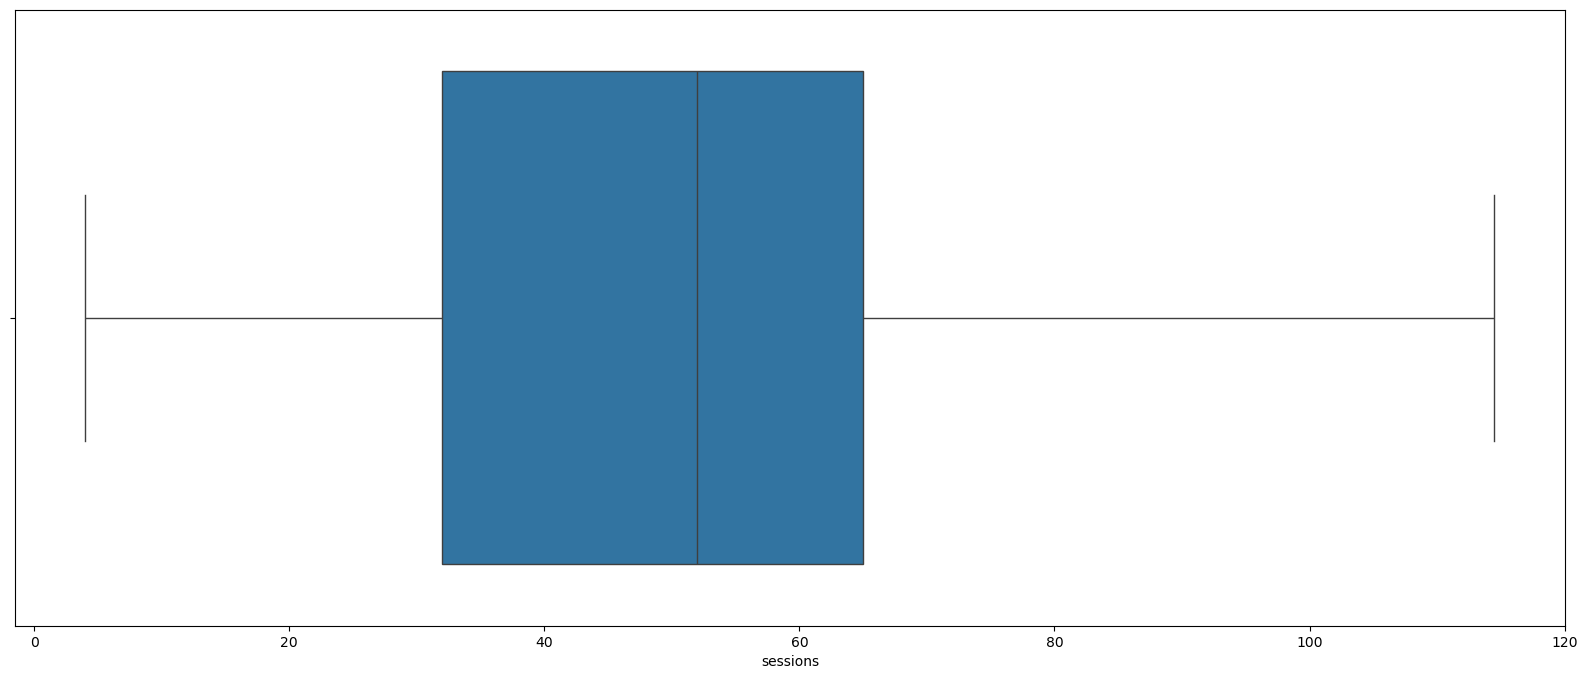

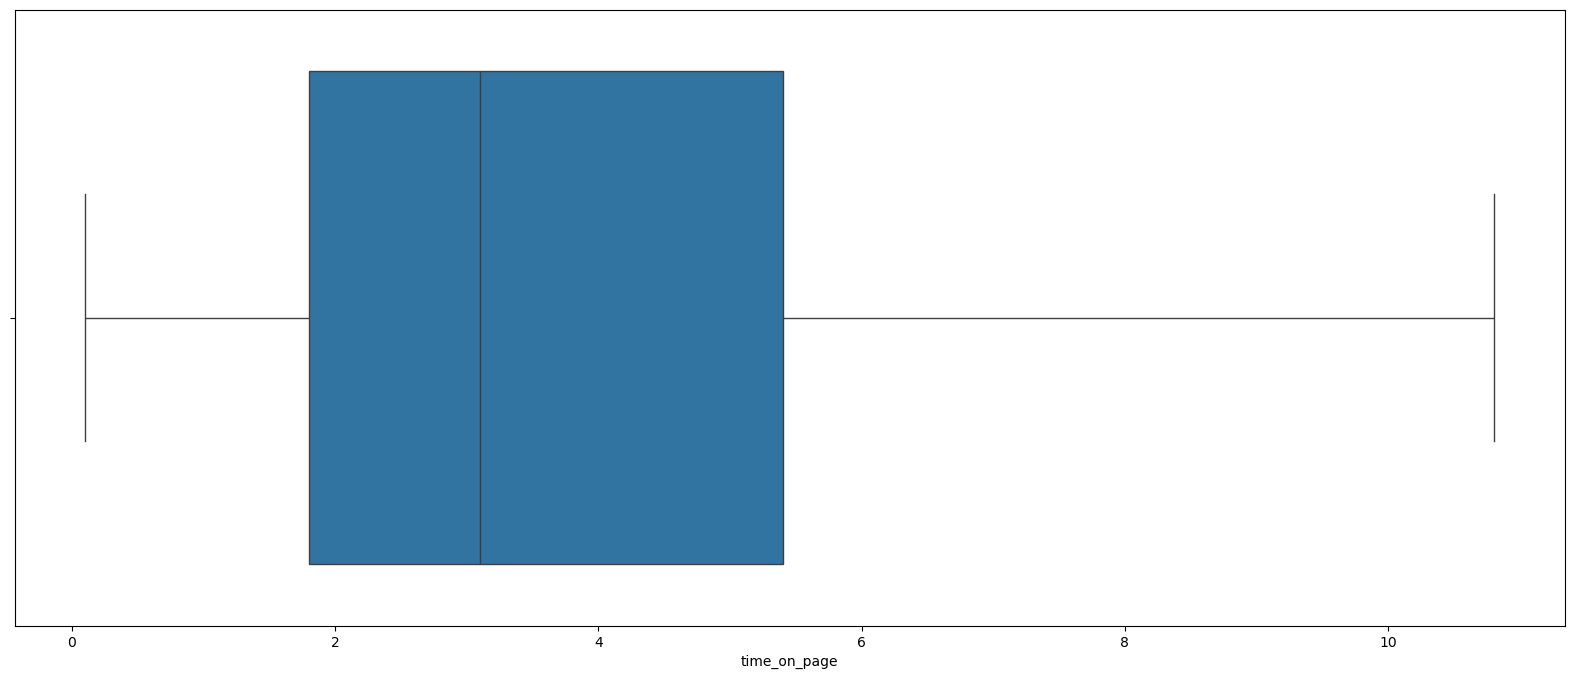

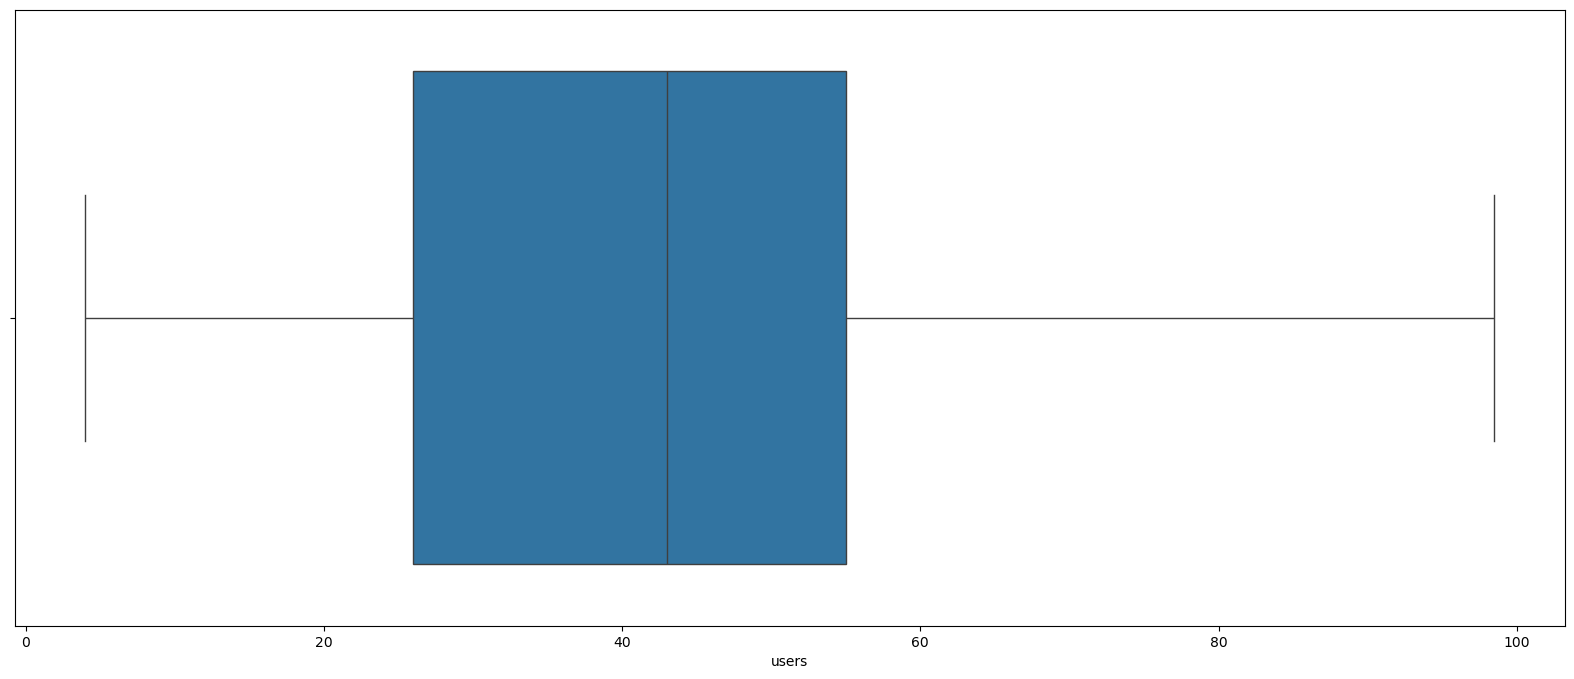

In [16]:
numerical_features = dt.select_dtypes(include="number").columns.difference(['conversion_rate'])

for i in numerical_features:
    sns.boxplot(data=dt, x=i)
    plt.show()

In [17]:
t = dt.select_dtypes(include="number").corr()

<Axes: >

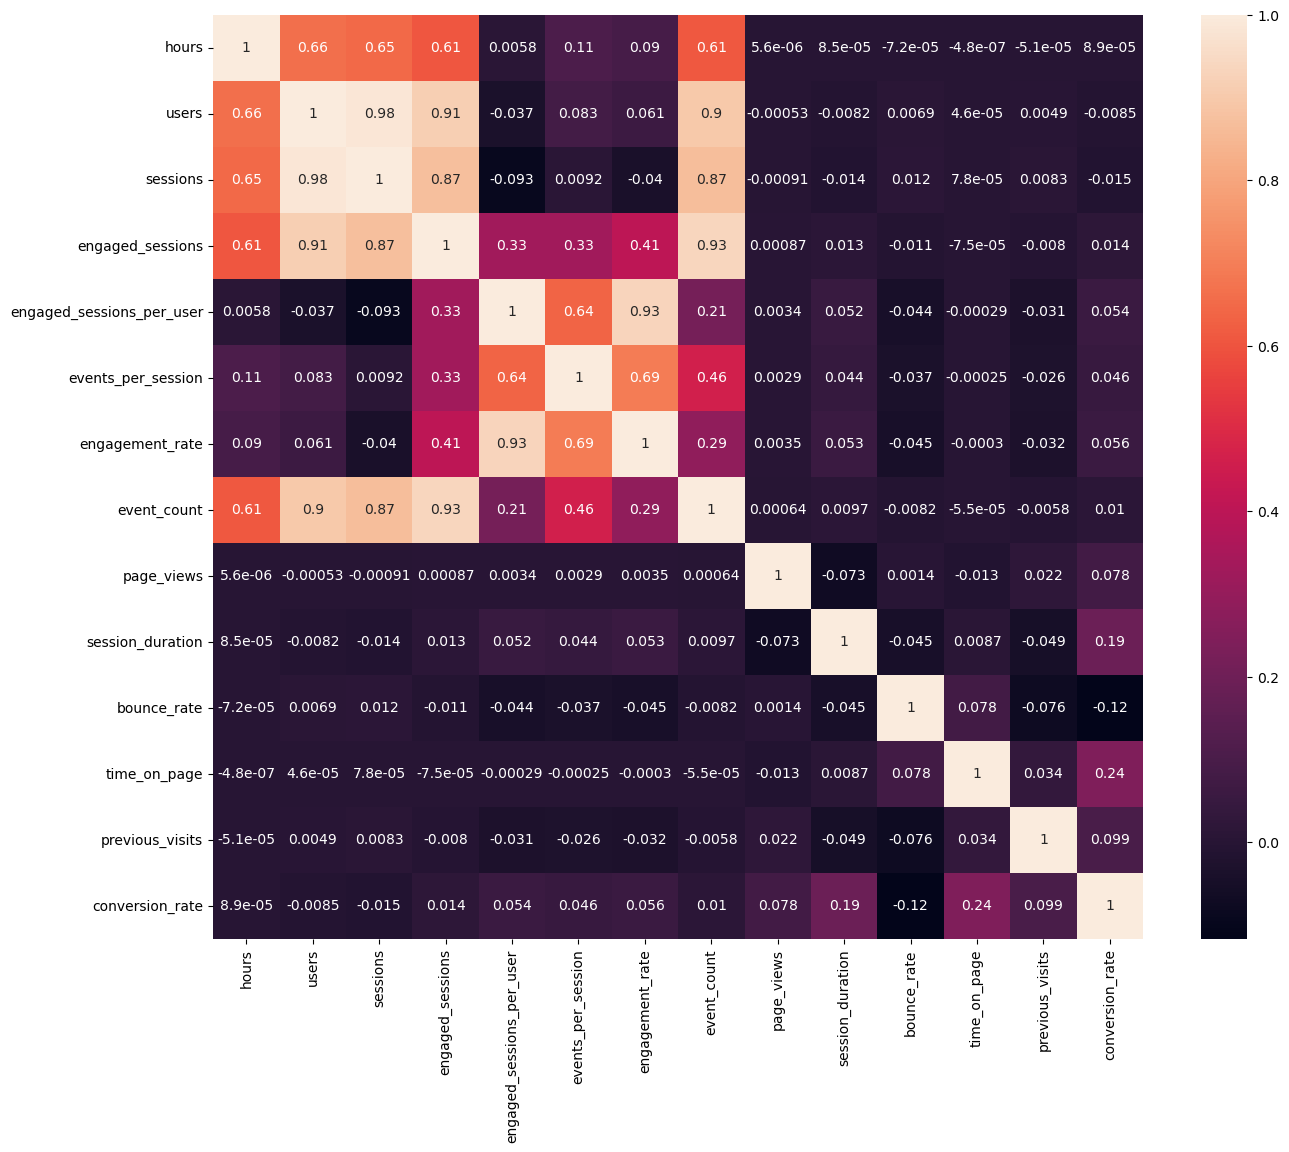

In [18]:
plt.figure(figsize=(15,12))
sns.heatmap(t,annot=True)

In [19]:
def time_to_seconds(time_str):
    h,m,s = map(float,time_str.split(':'))
    return h*3600+m*60+s

In [20]:
dt['avg_engagement_time_per_session'] = dt['avg_engagement_time_per_session'].apply(
    lambda x: time_to_seconds(x) if isinstance(x, str) else None
)

In [21]:
label_encoder = LabelEncoder()
dt['traffic_source'] = label_encoder.fit_transform(dt['traffic_source'])

In [22]:
X = dt.drop(columns=['conversion_rate', 'traffic_source', 'dates'], axis=1)
y = dt['conversion_rate']
X = pd.get_dummies(X, drop_first=True)

In [23]:
dt['dates'] = pd.to_datetime(dt['dates'])
dt['date_numeric'] = dt['dates'].astype('int64') // 10**9 

In [24]:
dt.drop("dates",axis=1, inplace=True)

In [25]:
dt

,traffic_source,hours,users,sessions,engaged_sessions,avg_engagement_time_per_session,engaged_sessions_per_user,events_per_session,engagement_rate,event_count,page_views,session_duration,bounce_rate,time_on_page,previous_visits,conversion_rate,date_numeric
0,0,4,11.0,17.0,6,59.352941,0.55,3.88,0.350,66.0,2,2.773784,0.485768,2.973653,3,1.0,1716940800
1,0,6,11.0,15.0,5,5.466667,0.45,2.67,0.330,40.0,2,2.773784,0.485768,2.973653,3,1.0,1716854400
2,0,5,11.0,16.0,2,9.625000,0.29,3.13,0.155,50.0,2,2.773784,0.485768,2.973653,3,1.0,1727395200
3,0,3,11.0,18.0,6,5.833333,0.55,3.06,0.330,55.0,2,2.773784,0.485768,2.973653,3,1.0,1715817600
4,0,2,11.0,18.0,3,20.222222,0.29,3.11,0.170,56.0,2,2.773784,0.485768,2.973653,3,1.0,1707350400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346169,0,22,98.5,114.5,65,34.462121,0.63,3.98,0.490,525.0,3,0.882638,0.338026,5.186908,3,1.0,1710633600
346170,0,23,98.5,114.5,70,64.125000,0.55,4.65,0.460,595.5,3,0.882638,0.338026,5.186908,3,1.0,1719619200
346171,0,22,98.5,114.5,72,39.020833,0.59,4.06,0.490,595.5,3,0.882638,0.338026,5.186908,3,1.0,1710547200
346172,0,23,98.5,114.5,72,39.939914,0.61,4.59,0.490,595.5,3,0.882638,0.338026,5.186908,3,1.0,1710633600


In [26]:
# Split Data into Training and Testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [28]:
rf_model = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestRegressor(random_state=42))
])


rf_param_grid = {
    "rf__n_estimators": [50, 100],
    "rf__max_depth": [10, 20],
    "rf__min_samples_split": [2, 5]
}


rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=0
)


rf_grid.fit(X_train, y_train)


best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)


rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)


rf_results = {
    "Model": "RandomForest",
    "Best Params": rf_grid.best_params_,
    "Best CV MSE": -rf_grid.best_score_,
    "Test MSE": rf_mse,
    "Test R²": rf_r2
}

print("\nRandom Forest Model Performance:")
print(pd.DataFrame([rf_results]))


Random Forest Model Performance:
          Model                                        Best Params  \
0  RandomForest  {'rf__max_depth': 20, 'rf__min_samples_split':...   

    Best CV MSE      Test MSE  Test R²  
0  1.647001e-31  4.079934e-31      1.0  


In [29]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [30]:
x_test=sc.transform(X_test)
x_test

array([[ 0.65200006,  0.07295718,  0.20445856, ..., -0.83362454,
         0.62977596,  0.6830416 ],
       [ 1.6640626 , -0.14499298, -0.17455918, ..., -0.30456131,
        -0.80773338, -0.67142098],
       [ 0.79658042,  0.50885749,  0.58347631, ...,  0.89919034,
        -0.37885   , -0.67142098],
       ...,
       [-1.66128573,  0.45436995,  0.86773962, ...,  0.11707583,
        -1.24123549, -0.67142098],
       [-1.66128573,  0.61783256,  1.10462571, ..., -1.21904534,
        -0.06184567,  0.00581031],
       [-0.79380356, -1.12576867, -1.21685798, ..., -0.4719759 ,
         1.65511036, -0.67142098]])

In [31]:
from sklearn.compose import ColumnTransformer

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols)
])

In [32]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("RandomForestRegressor", RandomForestRegressor())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['hours', 'users', 'sessions',
                                                   'engaged_sessions',
                                                   'avg_engagement_time_per_session',
                                                   'engaged_sessions_per_user',
                                                   'events_per_session',
                                                   'engagement_rate',
                                                   'event_count', 'page_views',
                                                   'session_duration',
                                                   'bounce_rate',
                                                   'time_on_page',
                                                   'previous_visits'])])),
                ('RandomForestRegressor', RandomForestRegressor())])

In [33]:
name = "Random Forest"
regressor = RandomForestRegressor(random_state=42)


pipeline = Pipeline([
    ("preprocessor", preprocessor),  
    ("regressor", regressor)
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


print(f"\n{name}")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))



Random Forest
MSE: 4.485661888982647e-31
R²: 1.0


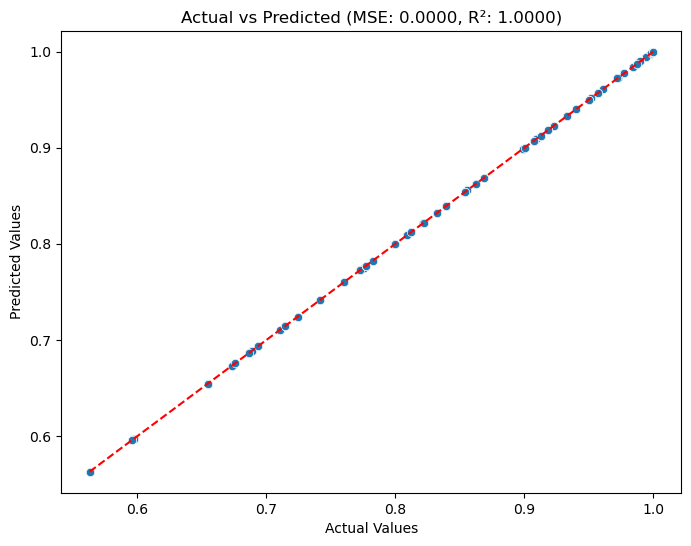

In [34]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted (MSE: {mse:.4f}, R²: {r2:.4f})")
plt.show()

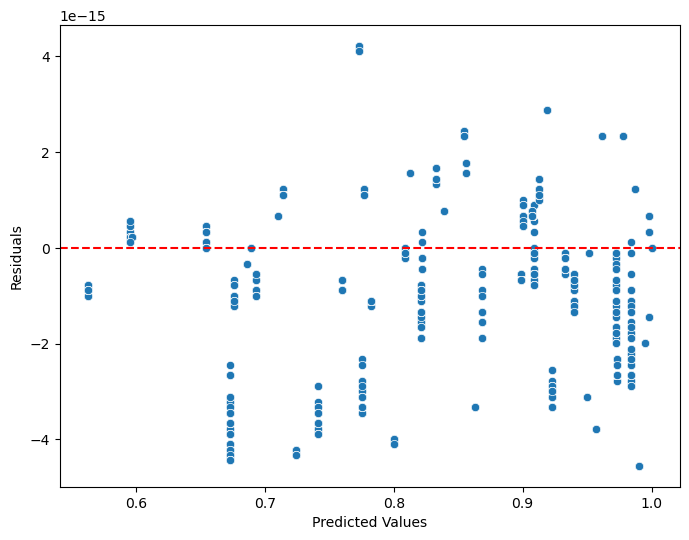

In [36]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

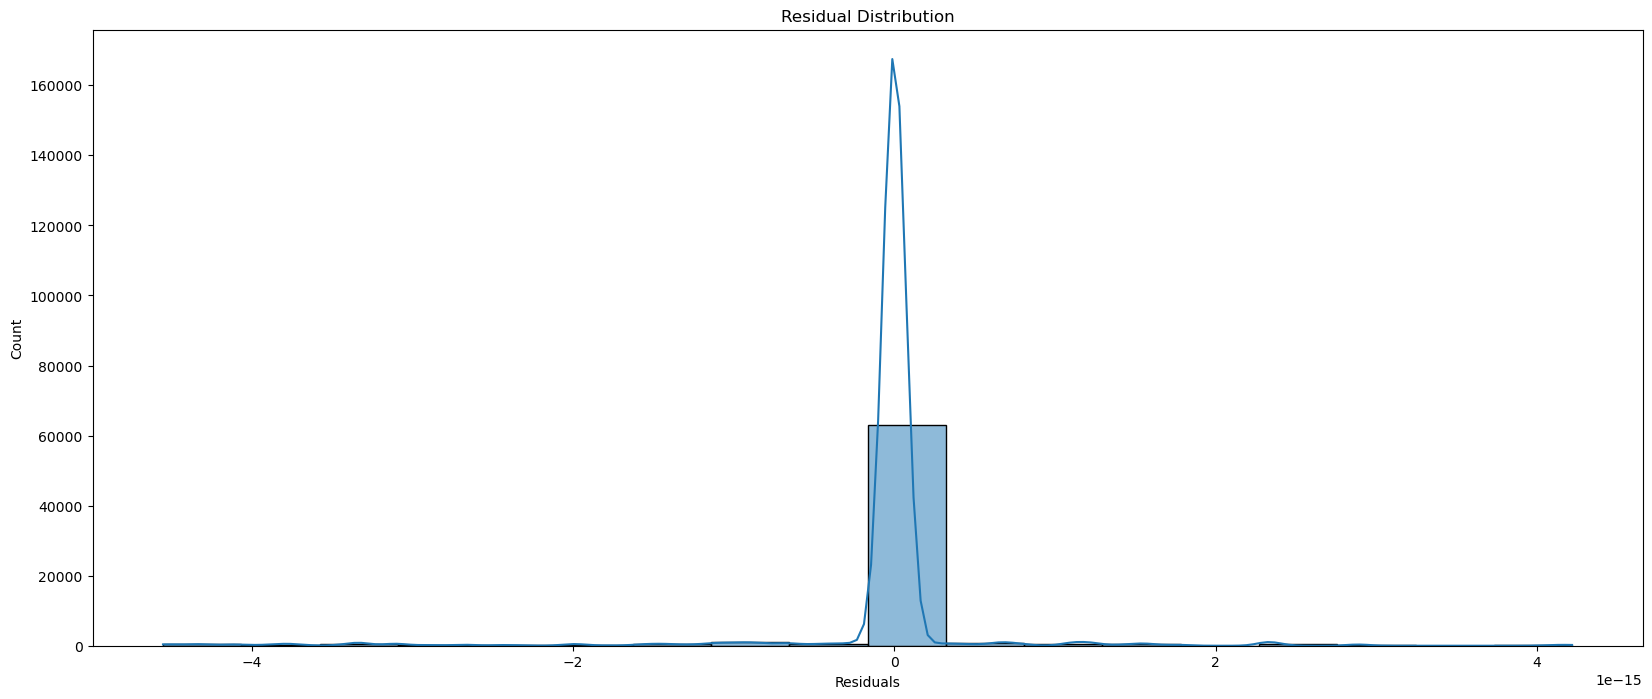

In [38]:
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()